<h1><b><i>E-Commerce Customer Churn</b></i></h1>
<h3><b>Problem Statement</b>: </h3>
    <p align = 'justify'>E-commerce online EDA adalah perusahaan pada bidang retail yang ingin menghindari adanya pelanggan yang churn karena persaingan di dunia e-commerce yang sangat ketat. Persaingan ketat dapat menyebabkan terjadi penurunan aktivitas pelanggan terhadap produk bisnis (e-commerce EDA) yang berdampak terhadap terjadinya penurunan pendapatan. Persaingan ketat ditandai dengan adanya penurunan frekuensi customer mengunjungi situs e-commerce EDA berdasarkan daysincelastorder. EDA ingin tahu siapa pelanggan yang berpotensi churn melalui churn rate untuk menghindari penurunan pelanggan dan dampak buruk terhadap perusahaan. Kemudian, ketika diketahui potensi churn dari pelanggan, salah satu solusinya dapat dilakukan dengan memberi promo untuk mencegah terjadinya churn.</p>
<h3><b>Goal</b>:</h3>
<p align ='justify'> Menemukan poin-poin yang dapat direkomendasikan untuk meningkatkan engagement
dan menurunkan customer churn rate seperti promo (discount atau jumlah cashback)
yang berhubungan dengan kategori barang yang sering diorder pelanggan beberapa
bulan kebelakang. Pencapaian churn rate yang rendah setelah memberikan tindakan
preventif terhadap perilaku customer yang akan churn melalui ML yang telah di bangun
berdasarkan data historis customer.</p>
<h3><b>Objective</b>: 
</h3>
<li>Mengidentifikasi feature apa yang mempengaruhi customerr untuk churn</li>
<li> Membangun model yang memberikan angka probabilitas kemungkinan churn menggunakan metode <i>supervised learning</i> (klasifikasi)</li>
<li>Memprediksi customer mana yang kedepannya berpotensial mengalami churn</li>
<li>Mengidentifikasi aksi apa yang akan memiliki dampak paling besar untuk me-<i>retain</i> customer</li>
<h3><b>Business Metrics</b>:</h3>
<li>Customer Churn Rate (Main)</li>
<li>Satisfaction Score, Complain Score (Secondary)</li>

<h4><i>Tentang Tim EDA</i></h4>
<p align = 'right'>Sebagai tim data scientist Perusahaan E-Commerce EDA yang bertanggung jawab dalam
meningkatkan performa Perusahaan khususnya dalam kuantitas dan kualitas customer
dengan memberikan rekomendasi untuk mendapatkan loyalitas customer berdasarkan
learning data historis.</p>

<h4><i>Tim Kami</i></h4>
<li>Innocentia Handani</li>
<li>Steven Matlian S</li>
<li>Rizka Septiani</li>
<li>Amalia Kusumaningtyas</li>
<li>Ryan Dwi Prasetyo</li>
<li>Inge Oktaviani</li>

# Import library & package

In [1]:
#library and package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.3.4
0.12.2
3.7.0


# Exploratory Data Analysis

<b>TIPS & TRICK:</b><br>
<p class ='tab'> <li> fokus pada kecepatan dan kelengkapan eksplorasi bukan estetika visualisasi</li>
<li>jangan menggali business insight karna EDA untuk mempermudah modeling</li>
</p>

<head>
<style>
table, th, td {
  border: ipx solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>
<h1> Variable Description </h1>

<table>
<tr>
  <th>Variable</th>
  <th>Description</th>
</tr>
  <td>CustomerID</td>
  <td>Unique customer ID</td>
</tr>
<tr>
  <td>Churn</td>
  <td>Churn Flag</td>
</tr>
<tr>
  <td>Tenure</td>
  <td>Tenure of customer in organization</td>
</tr>
<tr>
  <td>PreferredLoginDevice</td>
  <td>Preferred login device of customer</td>
</tr>
<tr>
  <td>CityTier</td>
  <td>City tier</td>
</tr><tr>
  <td>WarehouseToHome</td>
  <td>Distance in between warehouse to home of customer</td>
</tr><tr>
  <td>PreferredPaymentMode</td>
  <td>Gender of customer</td>
</tr><tr>
  <td>Gender</td>
  <td>Preferred login device of customer</td>
</tr><tr>
  <td>HourSpendOnApp</td>
  <td>Number of hours spend on mobile application or website</td>
</tr>
<tr>
  <td>NumberOfDeviceRegistered</td>
  <td>Total number of deceives is registered on particular customer</td>
</tr>
<tr>
  <td>PreferedOrderCat</td>
  <td>Preferred order category of customer in last month</td>
</tr>
<tr>
  <td>SatisfactionScore</td>
  <td>Satisfactory score of customer on service</td>
</tr>
<tr>
  <td>MaritalStatus</td>
  <td>Marital status of customer</td>
</tr>
<tr>
  <td>NumberOfAddress</td>
  <td>Total number of added added on particular customer</td>
</tr>
<tr>
  <td>Complain</td>
  <td>Any complaint has been raised in last month</td>
</tr><tr>
  <td>OrderAmountHikeFromlastYear</td>
  <td>Percentage increases in order from last year</td>
</tr>
<tr>
  <td>CouponUsed</td>
  <td>Total number of coupon has been used in last month</td>
</tr>
<tr>
  <td>OrderCount</td>
  <td>Total number of orders has been places in last month</td>
</tr>
<tr>
  <td>DaySinceLastOrder</td>
  <td>Day Since last order by customer</td>
</tr>
<tr>
  <td>CashbackAmount</td>
  <td>Average cashback in last month</td>
</tr>
</table>
</body>

### Data Collecting

In [2]:
xls = pd.ExcelFile('E Commerce Dataset.xlsx')
df = pd.read_excel(xls, 'E Comm')
df.sample(4)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1541       51542      0     8.0             Computer         1   
1358       51359      0     7.0                Phone         1   
3778       53779      0    16.0         Mobile Phone         1   
691        50692      0    12.0             Computer         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1541              8.0          Credit Card  Female             2.0   
1358             25.0                   CC    Male             3.0   
3778              9.0          Credit Card    Male             4.0   
691              15.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1541                         3  Laptop & Accessory                  4   
1358                         3              Mobile                  1   
3778                         5        Mobile Phone                  4   
691                          3  Laptop & Accessory                  4   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1541        Single                6         0                         11.0   
1358       Married                1         0                         11.0   
3778       Married                6         0                         15.0   
691         Single               21         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1541         0.0         1.0                2.0          144.25  
1358         0.0         1.0                2.0          126.61  
3778         2.0         2.0                1.0          173.41  
691          1.0         1.0                3.0          167.82

In [3]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


<i>
<ul>Numerical data
<li>apakah nilai yang tertera pada setiap kolom masuk akal? -dari output describe-</li>
<li>apakah nilai maksimal/minimal masih berada dibatas wajar?</li>
<li>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</li>
</ul>
<hr>
<ul>Categorical data
<li>apakah jumlah unique values masuk akal?</li>
<li>apakah frekuensi dari nilai yang paling umum terlalu timpang?</li>
</ul>

### Descriptive Statistic

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df_num.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

<b>apakah nilai yang tertera pada setiap kolom masuk akal?</b><br>
<li>jumlah count berbeda-beda, artinya ada data NaN.</li>

In [6]:
df.describe().loc[['min','max']].T

min       max
CustomerID                   50001.0  55630.00
Churn                            0.0      1.00
Tenure                           0.0     61.00
CityTier                         1.0      3.00
WarehouseToHome                  5.0    127.00
HourSpendOnApp                   0.0      5.00
NumberOfDeviceRegistered         1.0      6.00
SatisfactionScore                1.0      5.00
NumberOfAddress                  1.0     22.00
Complain                         0.0      1.00
OrderAmountHikeFromlastYear     11.0     26.00
CouponUsed                       0.0     16.00
OrderCount                       1.0     16.00
DaySinceLastOrder                0.0     46.00
CashbackAmount                   0.0    324.99

<b>apakah nilai maksimal/minimal masih berada dibatas wajar?</b><br>
<li>Churn, CityTier merupakan data kategorikal</li>
<li>Apa informasi yang didapatkan dari angka tenure? Apakah lama customer menggunakan layanan?</li>
<li>WarehouseToHome, angka maksimalnya 127km, apakah ini karena mmg tidak ada warehouse yang lebih dekat atau lainnya?</li>
<li>NumberOfAddress perlu diperhatikan lebih lanjutkan jika ingin digunakan</li>

In [7]:
df.describe().loc[['mean','50%']].T

mean       50%
CustomerID                   52815.500000  52815.50
Churn                            0.168384      0.00
Tenure                          10.189899      9.00
CityTier                         1.654707      1.00
WarehouseToHome                 15.639896     14.00
HourSpendOnApp                   2.931535      3.00
NumberOfDeviceRegistered         3.688988      4.00
SatisfactionScore                3.066785      3.00
NumberOfAddress                  4.214032      3.00
Complain                         0.284902      0.00
OrderAmountHikeFromlastYear     15.707922     15.00
CouponUsed                       1.751023      1.00
OrderCount                       3.008004      2.00
DaySinceLastOrder                4.543491      3.00
CashbackAmount                 177.223030    163.28

<b>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</b><br>
<li>NumberOfAddress kemungkinan ada outlier karena nilai maksimal adalah 22 tetapi median dan meannya berada diangka 4.2 dan 3</li>

In [8]:
df_cat.describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

<b>apakah jumlah unique values masuk akal?</b>
<li>tidak ada yang janggal</li>
<b>apakah frekuensi dari nilai yang paling umum terlalu timpang?</b>
<li>Gender:Male, terlihat lebih dari setengah dari data</li>
<li>MartialStatus:Married, memiliki jumlah data lebih dari setengah dari 3 pilihan</li>

In [9]:
df_cat['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Apakah mobile phone dan phone sama? jika sama berarti harus di rename salah satunya <br>
apakah kalau misal di rename itu sebelum di split data atau setelah?

In [10]:
df_cat['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [11]:
df_cat['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [12]:
df_cat['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [13]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<i>
<ul>
<li>Apakah ada data dengan tipe data yang kurang sesuai?</li></i>
ya, pada CityTier dan Churn daripada numerik ada baiknya menjadi kategorikal
<i>
<li>Apakah ada data yang hilang?</li></i>
ya, terdapat 7 feature yang datanya tidak lengkap atau kosong
</ul>

### Univariate Analysis

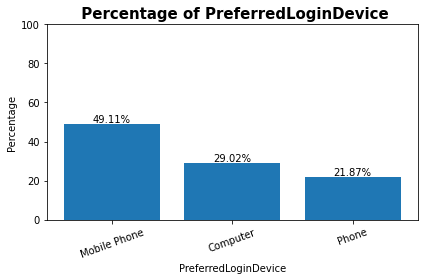

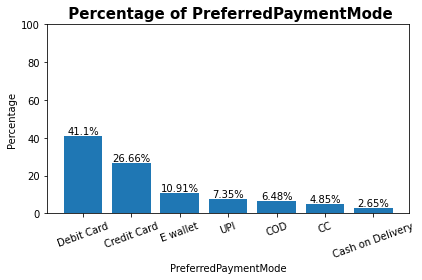

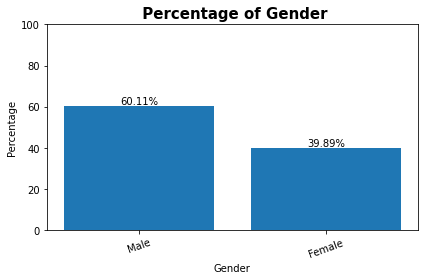

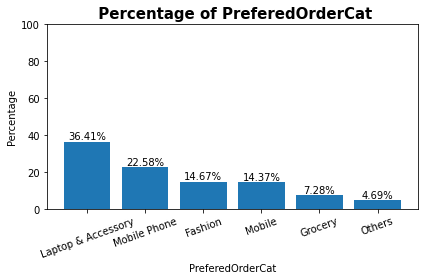

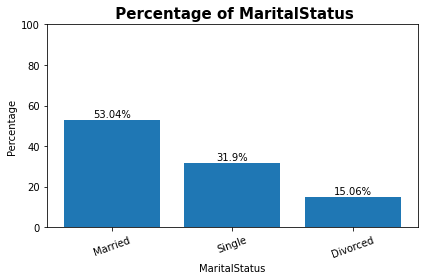

In [14]:
cat_var=df.select_dtypes(exclude = 'number')

# Calculate the percentage of each categorical variable
for column in cat_var:
    counts = df[column].value_counts()
    percent = round((counts / len(df)) * 100,2)
    
# Create the bar plot
    fig, ax = plt.subplots()
    ax.bar(counts.index, percent)
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.set_title(f" Percentage of {column}", fontweight='bold', fontsize=15)

# Add the percentage labels to the bars
    for i in range(len(percent)):
        value = round(percent[i], 2)
        label = f'{value}%'
        plt.text(i, percent[i], label, ha='center', va='bottom')
        plt.xticks(rotation=20)
    
# Show the plot
    plt.tight_layout()
    plt.show()

In [15]:
df_joinduplicate=df.copy()
#menggabungkan phone ke mobile phone pada kolom PreferredLoginDevice
#menggabungkan COD ke cash on delivery pada kolom PreferredPaymentMode
#menggabungkan CC ke credit card pada kolom PreferredPaymentMode
#menggabungkan mobile ke Mobilephone card pada kolom PreferedOrderCat
df_joinduplicate['PreferredLoginDevice'] = df_joinduplicate['PreferredLoginDevice'].replace("Phone", "Mobile Phone")
df_joinduplicate['PreferredPaymentMode'] = df_joinduplicate['PreferredPaymentMode'].replace("COD", "Cash on Delivery")
df_joinduplicate['PreferredPaymentMode'] = df_joinduplicate['PreferredPaymentMode'].replace("CC", "Credit Card")
df_joinduplicate['PreferedOrderCat'] = df_joinduplicate['PreferedOrderCat'].replace("Mobile", "Mobile Phone")
df_joinduplicate.sample(4)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1053       51054      0     0.0         Mobile Phone         3   
5529       55530      1     1.0         Mobile Phone         3   
3097       53098      0    19.0         Mobile Phone         1   
920        50921      0    13.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1053              8.0          Credit Card  Female             NaN   
5529             20.0             E wallet  Female             3.0   
3097             17.0           Debit Card    Male             4.0   
920               NaN          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1053                         3        Mobile Phone                  3   
5529                         4  Laptop & Accessory                  3   
3097                         4        Mobile Phone                  2   
920                          3        Mobile Phone                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1053        Single                2         0                         19.0   
5529        Single                5         1                         12.0   
3097      Divorced                5         0                         22.0   
920        Married                3         0                         14.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1053         0.0         2.0                2.0          127.83  
5529         1.0         3.0                NaN          223.54  
3097         2.0         2.0                3.0          151.54  
920          0.0         1.0                2.0          123.45

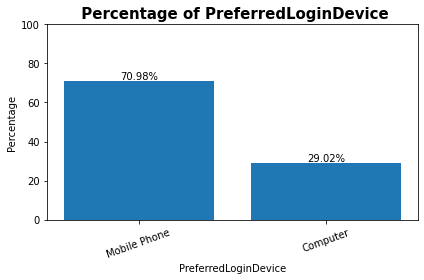

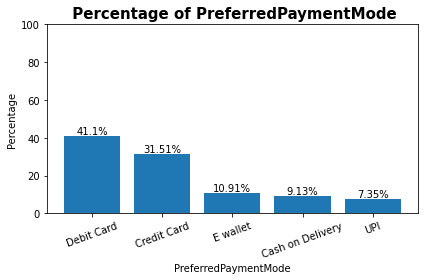

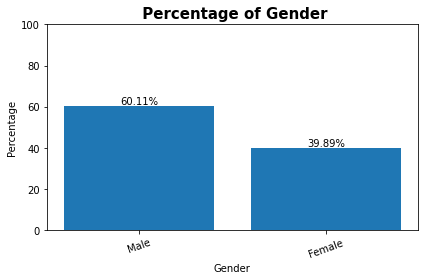

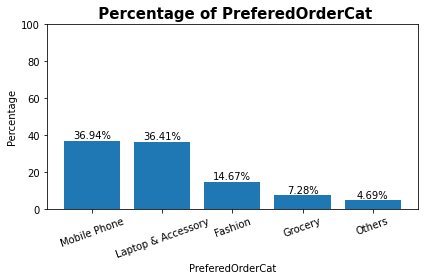

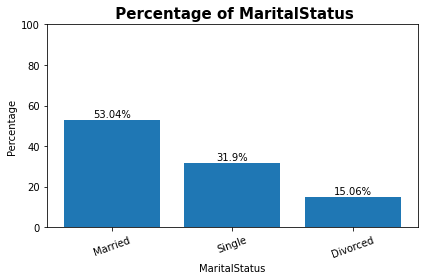

In [16]:
cat_var=df_joinduplicate.select_dtypes(exclude = 'number')

# Calculate the percentage of each categorical variable
for column in cat_var:
    counts = df_joinduplicate[column].value_counts()
    percent = round((counts / len(df_joinduplicate)) * 100,2)
    
# Create the bar plot
    fig, ax = plt.subplots()
    ax.bar(counts.index, percent)
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.set_title(f" Percentage of {column}", fontweight='bold', fontsize=15)

# Add the percentage labels to the bars
    for i in range(len(percent)):
        value = round(percent[i], 2)
        label = f'{value}%'
        plt.text(i, percent[i], label, ha='center', va='bottom')
        plt.xticks(rotation=20)
    
# Show the plot
    plt.tight_layout()
    plt.show()

*Interpretasi* :
Plot diatas persentase dari banyak data disetiap variable di masing masing features categorical

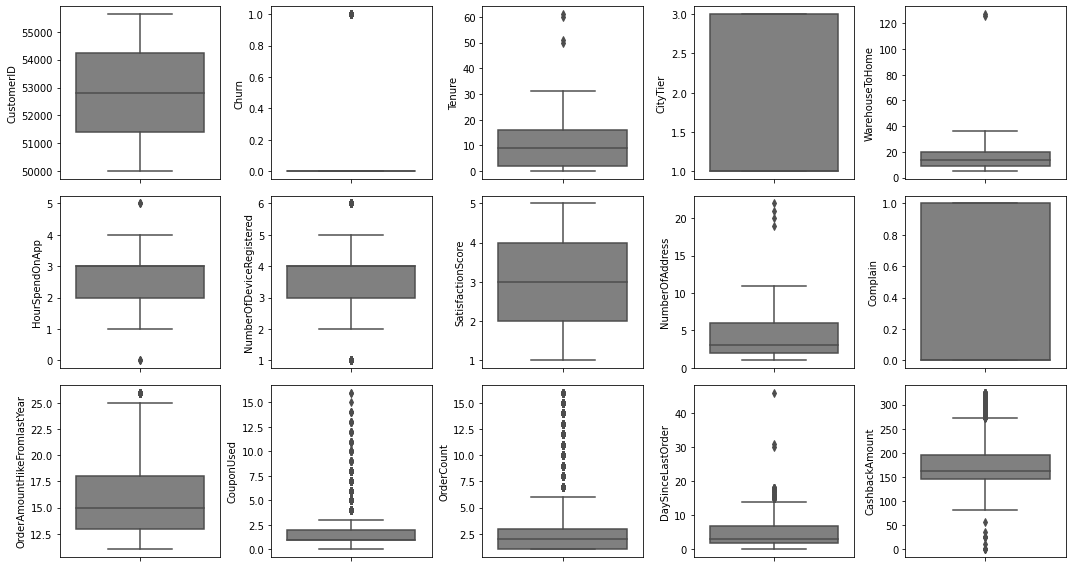

In [17]:
features = df_num.columns
fig = plt.subplots(figsize=(15,8))
for i in range(0, len(features)):
    plt.subplot(3, int(len(features)/3), i+1)
    sns.boxplot(y=df[features[i]],color='grey', orient='v')
plt.tight_layout()
plt.show()

<li>Citytier -> categorical</li>
<li>Complain -> categorical</li>
<li>Churn -> categorical</li><br>
Berapa banyak dan berapa jauh outlier di setiap kolom?
<li> HourSpendingOnApp dan NumberOfDeliveryRegistered memiliki outlier pada nilai min dan max</li>
<li> Pada WarehouseToHome ada pencilan dengan jarak yang jauh</li>
<li> CashbackAmount memiliki banyak pencilan</li>
<li>CouponUsed dan OrderCount juga memiliki banyak pencilan</li>

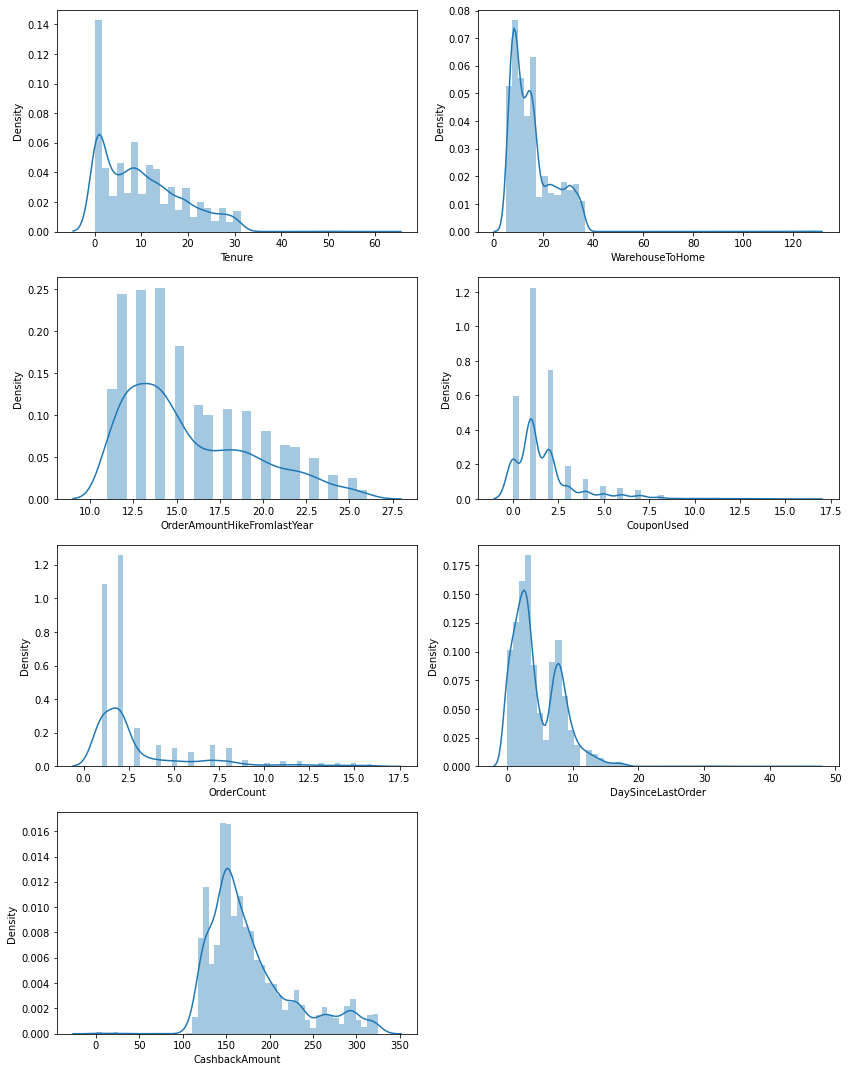

In [18]:
#individual displot for tenure, warehousetohome, OrderAmountHikeFromlastYear, couponused, ordercount,
#daysincelastorder, cashbackamount
col = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(col)):
    plt.subplot(4, int(len(col)/3), i+1)
    sns.distplot(df[col[i]])
plt.tight_layout()
plt.show()

<ul>Individual Displot
<li>bagaimana bentuk distribusi setiap kolom?</li>
<li>apakah ada nilai-nilai tertentu yang umum?</li>
</ul>

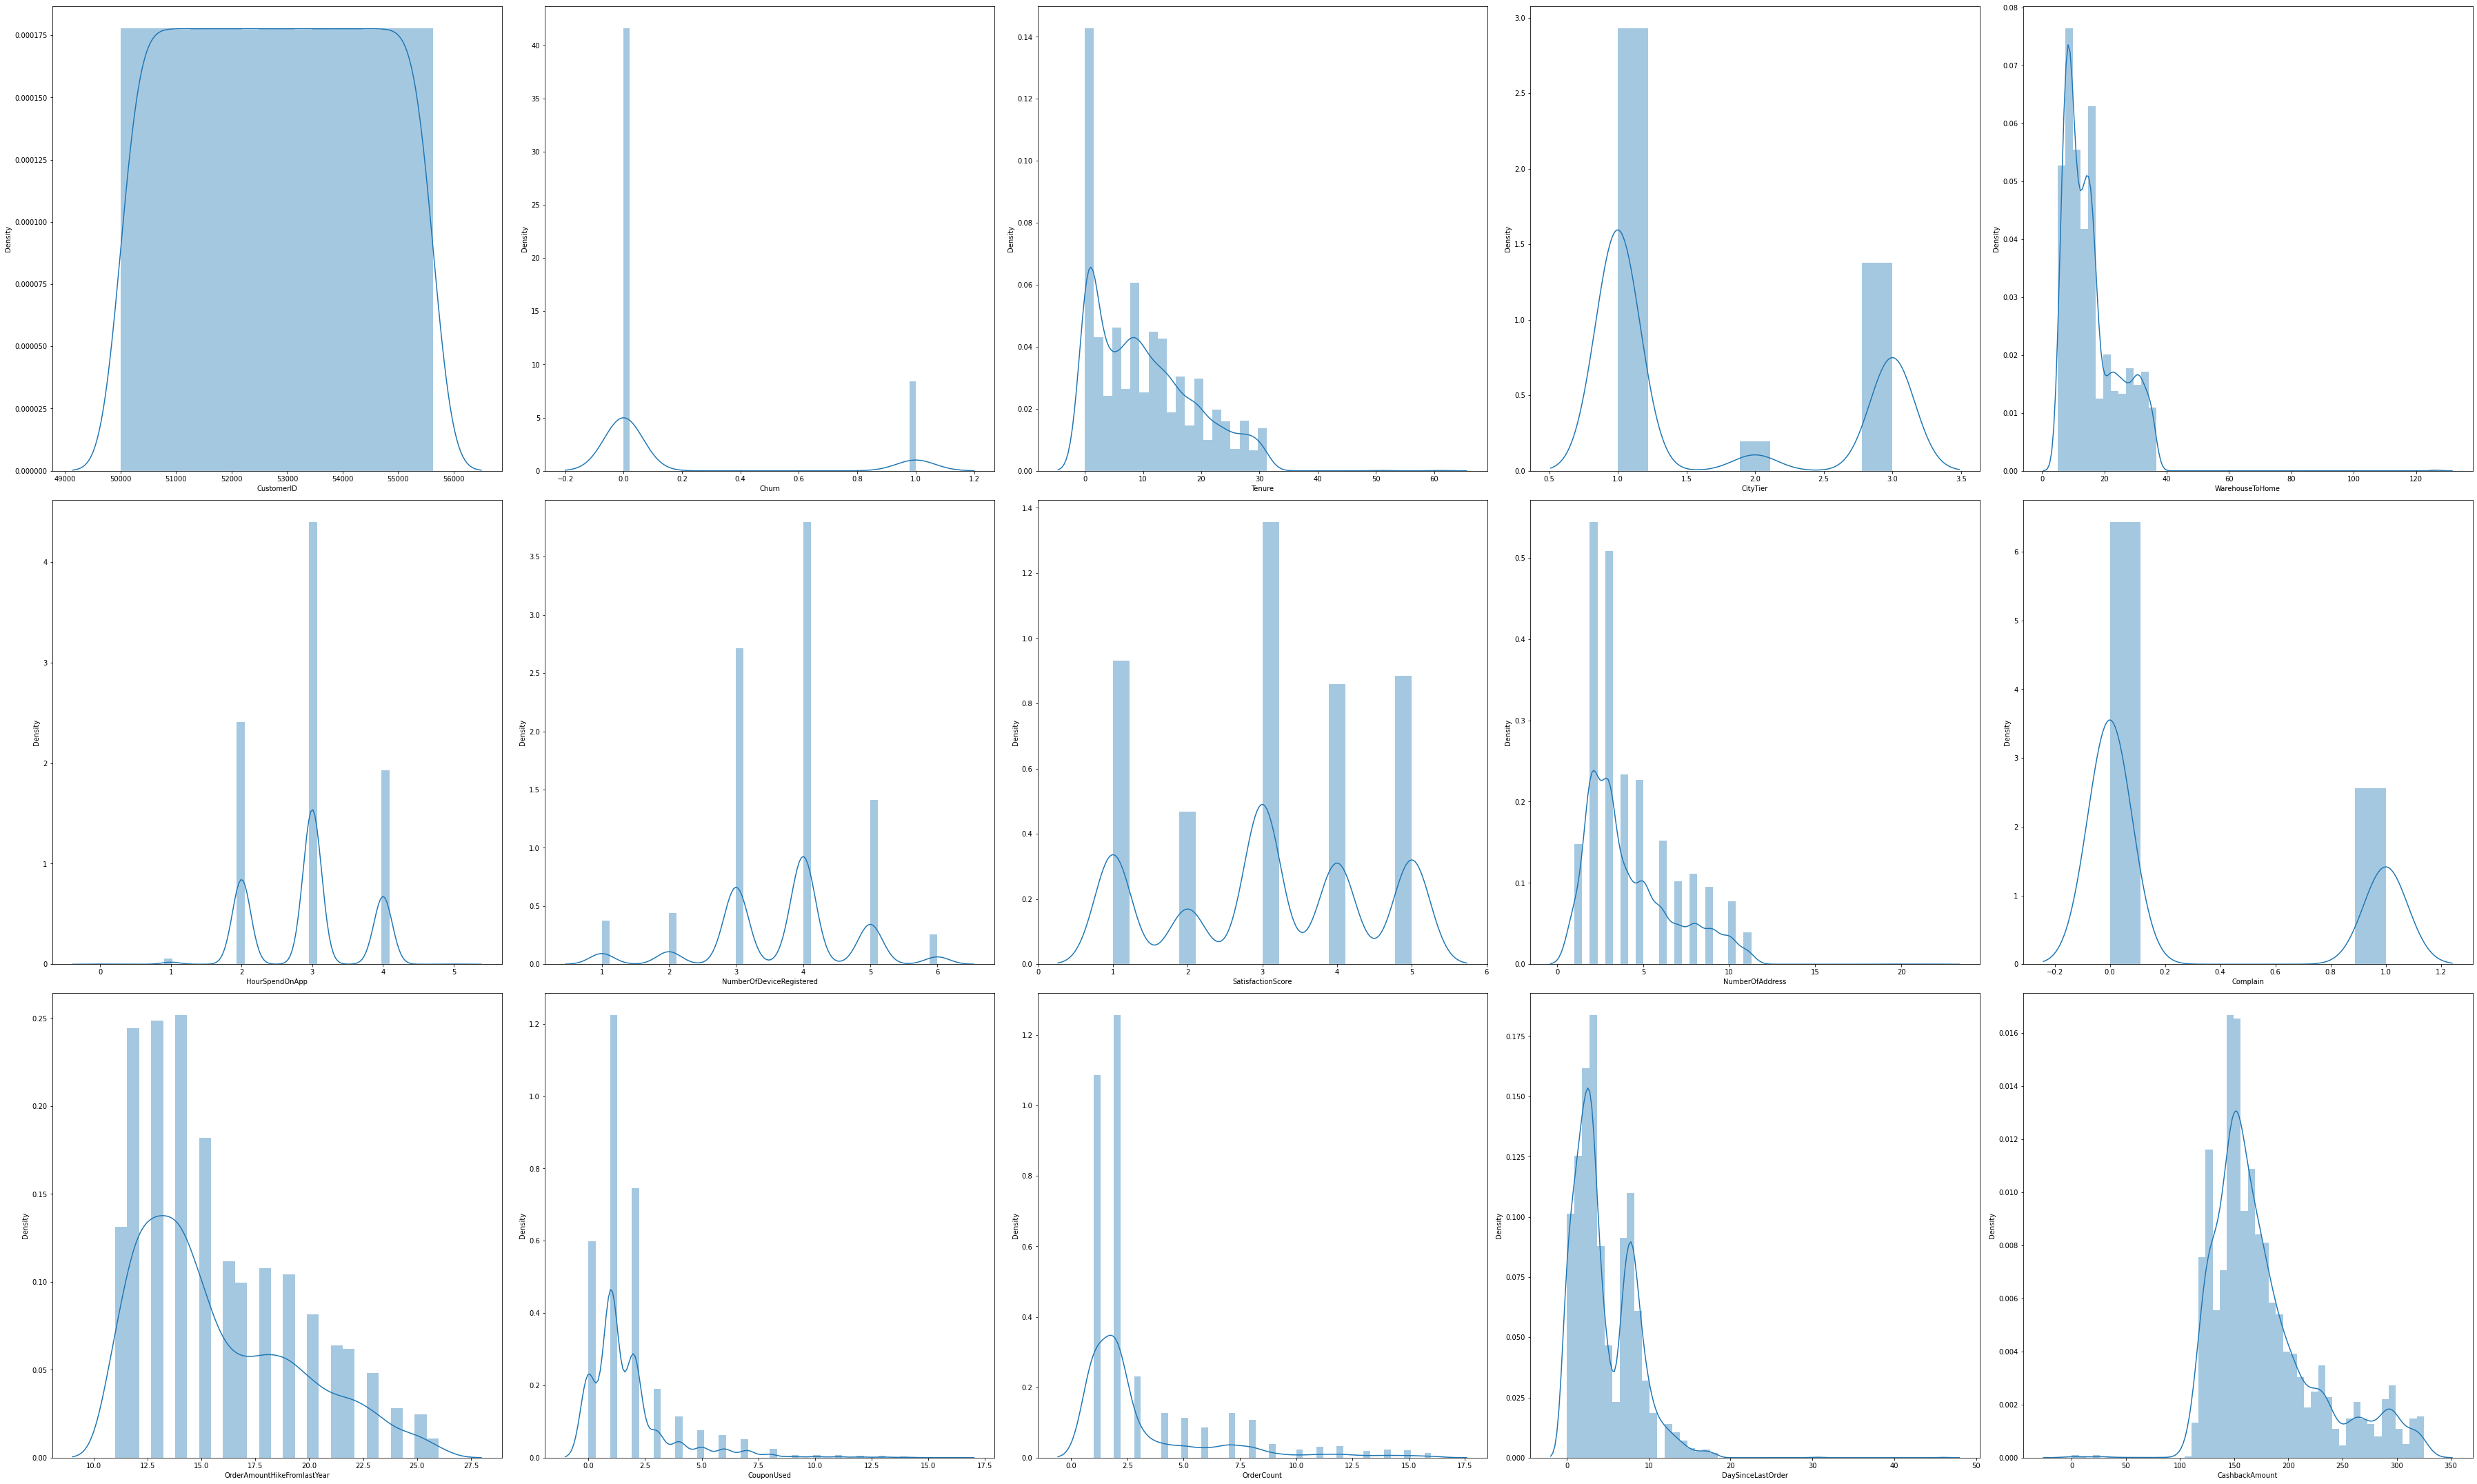

In [19]:
num_var = df_num.columns
fig = plt.subplots(figsize=(50,30))
for i in range(0, len(num_var)):
    plt.subplot(3, int(len(num_var)/3), i+1)
    sns.distplot(df[num_var[i]])
plt.tight_layout()
plt.show()

Interpretasi :
Grafik diatas adalah distribusi setiap features.

Skew positif ▶ Tenure, WarehouseToHome ,NumberOfAddress, OrderAmountHikeFromlastYear,
       CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

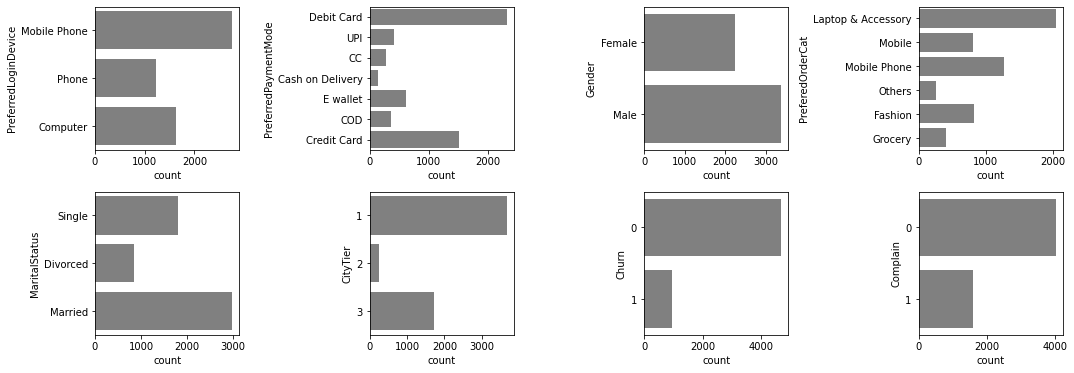

In [20]:
#countplot for categorical
categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
               'PreferedOrderCat', 'MaritalStatus','CityTier','Churn','Complain']
fig = plt.subplots(figsize=(15,10))
for i in range (0,len(categorical)):
    plt.subplot(4,int(len(categorical)/2),i+1)
    sns.countplot(y=df[categorical[i]],color='gray',orient='v')
plt.tight_layout()

<ul>Individual countplot
<li>ketimpangan antar kategori, terutama pada target</li> sebaran kategori yang timpang merupakan indikasi ketidakgunaan feature. Di Target kalau timpang bisa buat <i>learning</i> gagal.
<li> Terlihat jika sebaran Churn lumayan timpang</li>
</ul>


### Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel

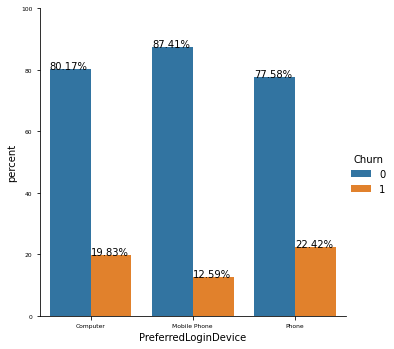

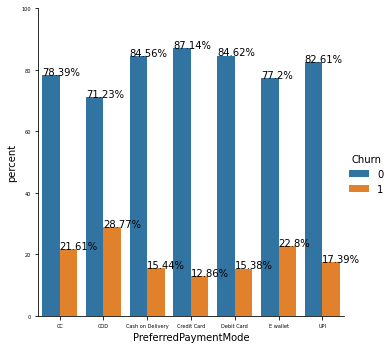

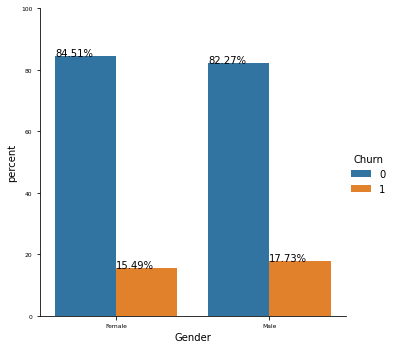

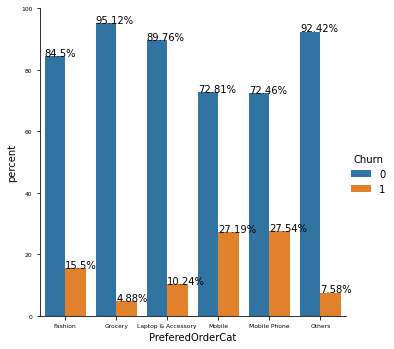

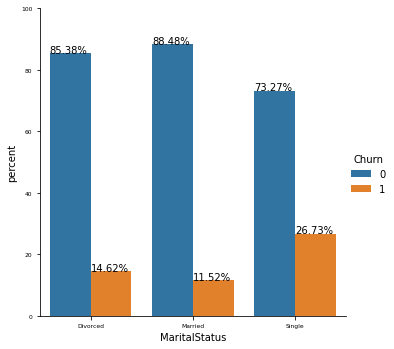

In [21]:
# sebelum duplikat
x, y = 'PreferredLoginDevice', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

x, y = 'PreferredPaymentMode', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'Gender', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'PreferedOrderCat', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'MaritalStatus', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

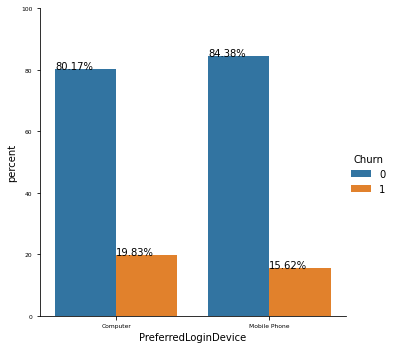

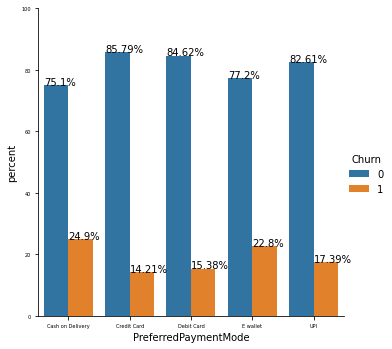

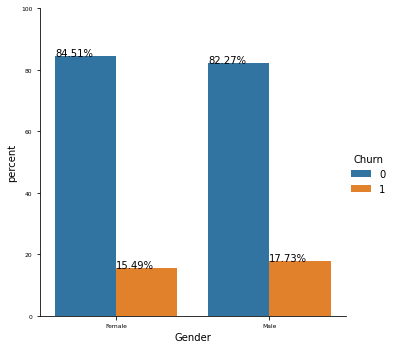

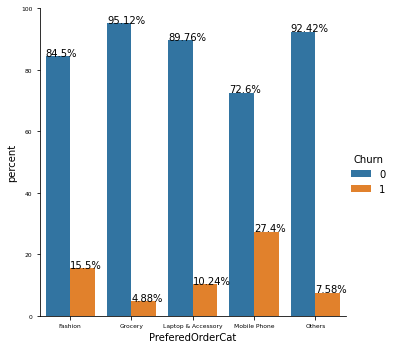

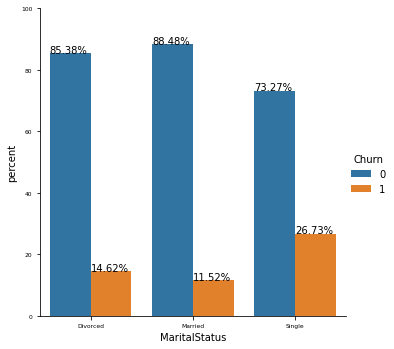

In [22]:
# setelah duplikat
x, y = 'PreferredLoginDevice', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

x, y = 'PreferredPaymentMode', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'Gender', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'PreferedOrderCat', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'MaritalStatus', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

Interpretasi:
Dari grafik diatas dapat dilihat keterhubungan antara data categorical terhadap target.
Secara keseluruhan dari setiap grafik data categorical memiliki tingkat tidak churn yang lebih tinggi dari pada yang churn

1. PreferredLoginDevice : jumlah tingkat churn setiap kategori sama sama dibawah 500

2. PreferredPaymentMode : Debit card memiliki tingkat churn yang lebih tinggi diantara 7 kategori

3. Gender : memiliki jumlah tingkat churn yang tidak selisih jauh

4. PreferedOrderCat : Mobile Phone memiliki jumlah tingkat churn yang paling tinggi diantara 6 kategori

5. MaritalStatus : divorced adalah kategori dengan jumlah churn paling rendah diantara 3 kategori

*   Pada feature PreferredLoginDevice, ada 2 data yang bisa digabungkan yaitu mobile phone dan phone. Alasan dilakukan penggabungan dikarenakan e-commerce tidak bisa diakses melalui telepon rumah / landline. Sehingga perlu dilakukan agar tidak terjadi duplikasi. Setelah dilakukan penggabungan, perbandingan churn antara login computer dan mobile phone dapat dibedakan yaitu lebih tinggi persentase yang churn dengan menggunakan computer.
*   Pada feature PreferredPaymentMethod, ada 2 data yang bisa digabungkan yaitu credit card dengan cc dan cash on delivery dengan cod.. Alasan dilakukan penggabungan dikarenakan metode pembayaran CC adalah singkatan dari Credit Card, dan COD adalah cash on delivery, sehingga perlu dilakukan agar tidak terjadi duplikasi. Setelah dilakukan penggabungan, perbandingan churn antara masing-masing payment method dapat dibedakan, dan persentase churn tertinggi adalah dengan metode pembayaran cash on delivery.
*   Pada preferred order category juga dilakukan penggabungan pada mobile phone dengan mobile. Diperoleh persentase churn tertinggi pada preferred order mobile phone.

Insight:

Berdasarkan analisis data bivariate, preferred login device, payment method, preferred order dan marital status dapat menjadi faktor kemungkinan penyebab churn, sedangkan untuk gender, persentase churnnya tidak berbeda terlalu jauh. 


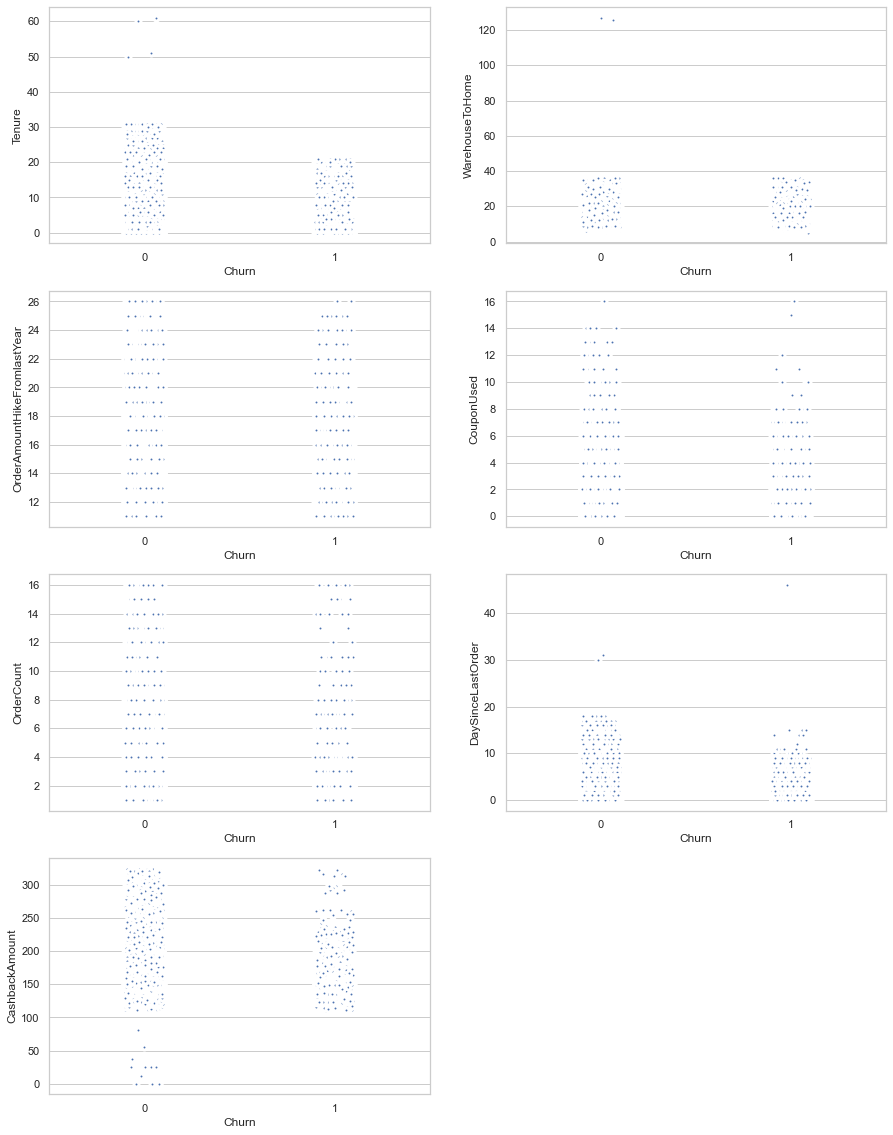

In [23]:
#Data numerical

num = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(15,20))
sns.set(style = 'whitegrid')
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.stripplot(y=df[num[i]], x="Churn", data=df,
                   linewidth=3, edgecolor='white')

Interpretasi :

*   Customer yang churn terdistribusi pada CashbackAmount di atas median nya, dengan kata lain customer yang menerima cashbackamount banyak pun tetap churn
*   Pada warehousetohome, customer yg jarak antara rumah dan warehouse nya paling jauh tidak churn

*   Pada Couponused, customer yang menggunakan coupon paling banyak juga churn








Produt Category dengan Complain

In [24]:
df_joinduplicate=df.copy()
df_joinduplicate['PreferedOrderCat'] = df_joinduplicate['PreferedOrderCat'].replace("Mobile", "Mobile Phone")

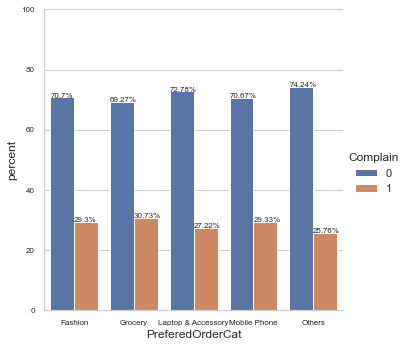

In [25]:
x, y = 'PreferedOrderCat', 'Complain'

df2 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df2)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Category grocery adalah category dengan presentase customer yg churn nya paling tinggi

Order Count - Hours Spend on App

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

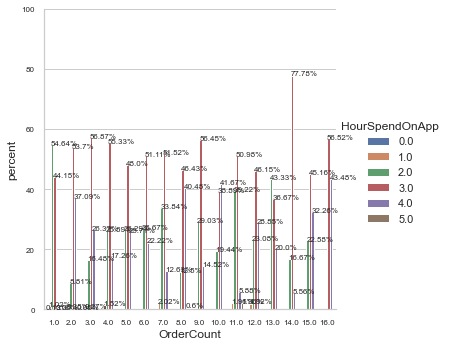

In [26]:
x, y = 'OrderCount', 'HourSpendOnApp'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Pada setiap jumlah order count, hoursspendonapp paling tinggi adalah 3 jam

Order Count - Churn

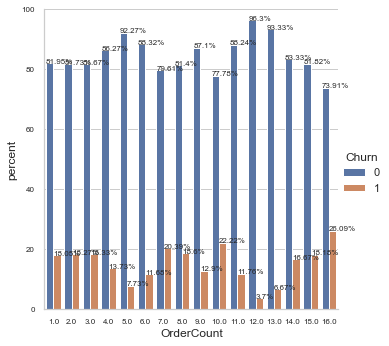

In [27]:
x, y = 'OrderCount', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Order count paling banyak (16), presentase churn nya juga paling tinggi (26,09%)

Day Since Last Order - Churn

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


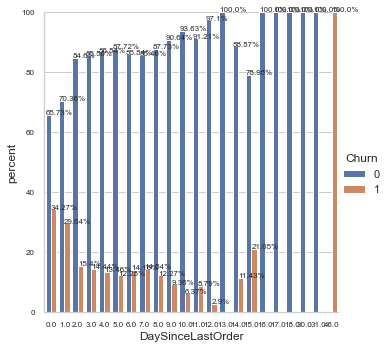

In [28]:
x, y = 'DaySinceLastOrder', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Presentase churn paling tinggi adalah pada customer yang daysincelast ordernya jg paling lama, lalu di urutan kedua adalah customer yang daysincelast order nya justru paling sebentar di 0-2 hari

City Tier - Churn

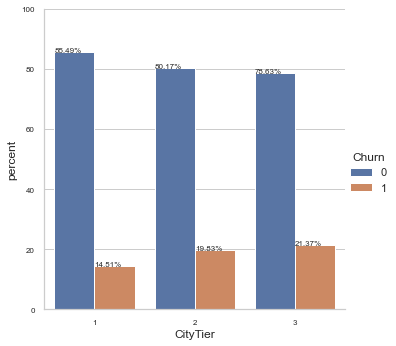

In [29]:
x, y = 'CityTier', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

City tier paling jauh (kategori 3) memiliki tingkat churn yang paling tinggi

Satisfaction Score - Churn

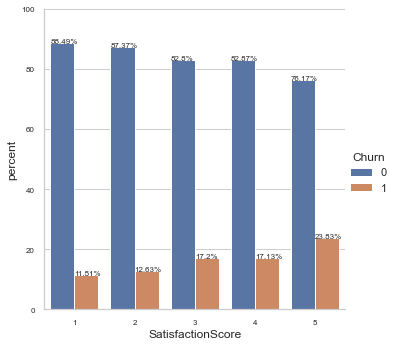

In [30]:
x, y = 'SatisfactionScore', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Satisfaction score 5 memiliki tingkat churn yang paling tinggi

Customer who Repeat Order

In [31]:
df4 = df.groupby('CustomerID').agg({'PreferedOrderCat':'unique'})
print(df4)

                PreferedOrderCat
CustomerID                      
50001       [Laptop & Accessory]
50002                   [Mobile]
50003                   [Mobile]
50004       [Laptop & Accessory]
50005                   [Mobile]
...                          ...
55626       [Laptop & Accessory]
55627                  [Fashion]
55628       [Laptop & Accessory]
55629       [Laptop & Accessory]
55630       [Laptop & Accessory]

[5630 rows x 1 columns]


In [32]:
df[df['CustomerID'].duplicated(keep=False)==True]

Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [33]:
df['CustomerID'].duplicated().sum()

0

Dengan tidak adanya duplicate di data customer ID dapat disimpulkan tidak ada customer yang melakukan repeat order dalam tabel ini

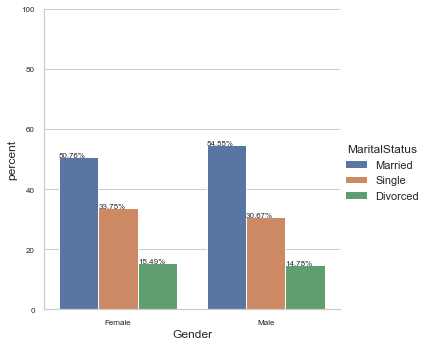

In [34]:
x, y = 'Gender', 'MaritalStatus'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

### Multivariate Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel

In [35]:
#heatmap (numerical variable)
df_heatmap=df_num.corr()
df_heatmap

CustomerID     Churn    Tenure  CityTier  \
CustomerID                     1.000000 -0.019083  0.029952  0.003239   
Churn                         -0.019083  1.000000 -0.349408  0.084703   
Tenure                         0.029952 -0.349408  1.000000 -0.060688   
CityTier                       0.003239  0.084703 -0.060688  1.000000   
WarehouseToHome                0.058909  0.076630 -0.018218  0.010624   
HourSpendOnApp                 0.598417  0.018675 -0.021226 -0.009150   
NumberOfDeviceRegistered       0.411098  0.107939 -0.023983  0.027934   
SatisfactionScore             -0.033146  0.105481 -0.013903 -0.011554   
NumberOfAddress                0.160814  0.043931  0.237666 -0.029440   
Complain                      -0.009944  0.250188 -0.021268  0.003375   
OrderAmountHikeFromlastYear    0.117243 -0.010058  0.005825 -0.031408   
CouponUsed                     0.234302 -0.008264  0.129035  0.021456   
OrderCount                     0.139008 -0.028697  0.186403  0.033388   
DaySinceLastOrder              0.113243 -0.160757  0.184552  0.017525   
CashbackAmount                 0.217129 -0.154118  0.476380  0.055746   

                             WarehouseToHome  HourSpendOnApp  \
CustomerID                          0.058909        0.598417   
Churn                               0.076630        0.018675   
Tenure                             -0.018218       -0.021226   
CityTier                            0.010624       -0.009150   
WarehouseToHome                     1.000000        0.060990   
HourSpendOnApp                      0.060990        1.000000   
NumberOfDeviceRegistered            0.019071        0.316800   
SatisfactionScore                   0.007722        0.031858   
NumberOfAddress                    -0.011020        0.145126   
Complain                            0.028696        0.006976   
OrderAmountHikeFromlastYear         0.038795        0.106843   
CouponUsed                         -0.003935        0.191528   
OrderCount                          0.002681        0.109575   
DaySinceLastOrder                   0.017829        0.075716   
CashbackAmount                     -0.009200        0.121490   

                             NumberOfDeviceRegistered  SatisfactionScore  \
CustomerID                                   0.411098          -0.033146   
Churn                                        0.107939           0.105481   
Tenure                                      -0.023983          -0.013903   
CityTier                                     0.027934          -0.011554   
WarehouseToHome                              0.019071           0.007722   
HourSpendOnApp                               0.316800           0.031858   
NumberOfDeviceRegistered                     1.000000          -0.017228   
SatisfactionScore                           -0.017228           1.000000   
NumberOfAddress                              0.084997           0.053583   
Complain                                     0.003407          -0.031115   
OrderAmountHikeFromlastYear                  0.069475          -0.027730   
CouponUsed                                   0.151685           0.017936   
OrderCount                                   0.103464           0.019764   
DaySinceLastOrder                            0.018208           0.032082   
CashbackAmount                               0.137183           0.003473   

                             NumberOfAddress  Complain  \
CustomerID                          0.160814 -0.009944   
Churn                               0.043931  0.250188   
Tenure                              0.237666 -0.021268   
CityTier                           -0.029440  0.003375   
WarehouseToHome                    -0.011020  0.028696   
HourSpendOnApp                      0.145126  0.006976   
NumberOfDeviceRegistered            0.084997  0.003407   
SatisfactionScore                   0.053583 -0.031115   
NumberOfAddress                     1.000000 -0.026399   
Complain                           -0.

Text(0.5, 1.0, 'Correlation Feature')

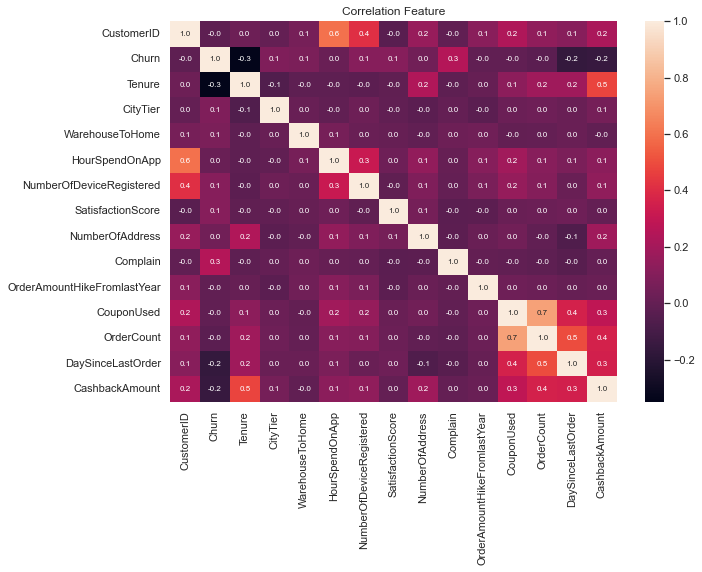

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df_heatmap, annot=True, fmt="0.1f", annot_kws={"fontsize":8})
plt.title('Correlation Feature')

Interpretasi :
Heatmap diatas menggambarkan nilai korelasi antar variabel. Dapat dilihat dari tingkat kepekatan warna, semakin terang maka korelasi semakin tinggi. kalo semakin gelap maka korelasi semakin rendah. 

Atau bisa juga korelasi dikatakan sangat kuat jika nilainya melebihi 0.7 jika kurang dari tersebut korelasi antar dua variabel tersebut lemah.

Hanya korelasi antara variabel OrderAccount dan CouponUsed yang mendapat nilai 0.7

<ul>
<li>Apakah feature memiliki korelasi dengan target?</li> feature yang memiliki nilai korelasi paling tinggi dengan target adalah Complain, dengan nilai 0.3

❓ kalau misal ada yang tidak berkolerasi dengan target solusinya apa?
<li>Apakah ada 2 feature yang berkolerasi kuat (>0.7)?</li>Tidak ada yang diatas 0.7, tetapi feature OrderAccount dan CouponUsed mendapat nilai 0.7

<Axes: xlabel='Tenure', ylabel='CashbackAmount'>

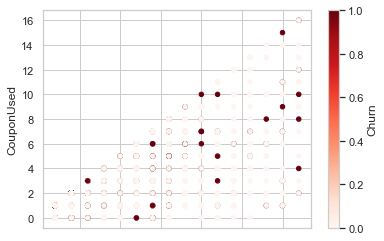

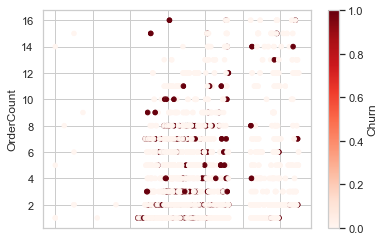

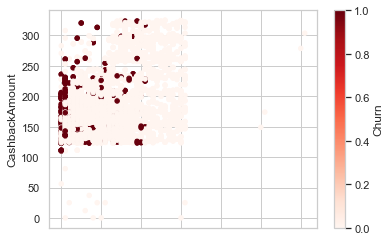

In [37]:
#scatterplot 3 features berdasarkan nilai korelasi pada heatmap
df.plot.scatter(x='OrderCount',y='CouponUsed',c='Churn',cmap='Reds') #0.7
df.plot.scatter(x='CashbackAmount',y='OrderCount',c='Churn',cmap='Reds') #0.4
df.plot.scatter(x='Tenure',y='CashbackAmount',c='Churn',cmap='Reds') #0.5

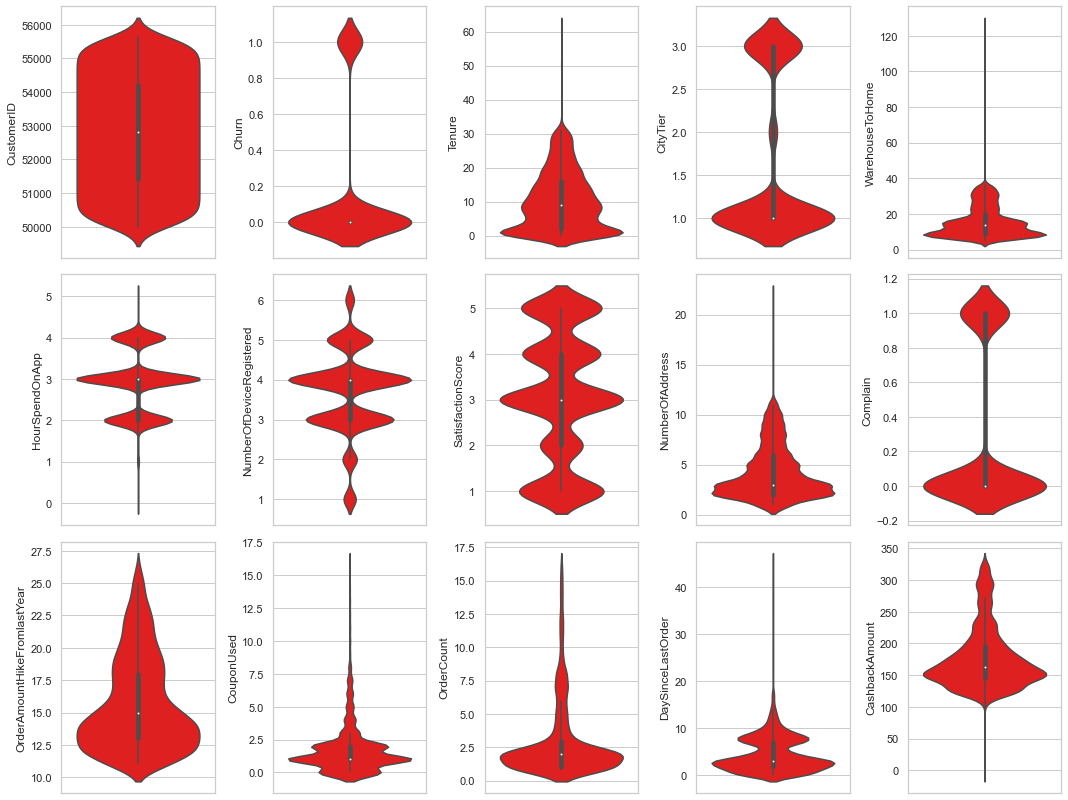

In [38]:
#Violinplot : representation of the distribution.
var=df_num.columns

fig = plt.subplots(figsize=(15,15))
for i in range(0, len(var)):
    plt.subplot(4, int(len(var)/3), i+1)
    sns.violinplot(y=df[var[i]], color='red')
plt.tight_layout()
plt.show()

Interpretasi :
violin plot merupakan gabungan antara bloxplot dan distribution plot

plot diatas adalah violinplot untuk variable numerical

dilihat dari distribusi : 
1. Churn : banyak yang tidak churn 
2. Tenure : kebanyakan ada di 0
3. CityTier : class 1 lebih banyak
4. WarehouseToHome : kebanyakan ada di range 10
5. HourSpendOnApp : lebih banyak di class 3
6. NumberOfDeviceRegistered : lebih banyak di class 4
7. SatisfactionScore : lebih banyak di class 3
8. NumberOfAddress : kebanyakan ada di range 2 atau 3
9. Complain : yg tidak complain lebih banyak
10. OrderAmountHikeFromlastYear : dominasi lebih banyak di range 12.5-15
11. CouponUsed : kebanyakan ada di sekitar 1.5
12. OrderCount : dominasi lebih banyak di range 2-2.5
13. DaySinceLastOrder : lebih banyak di range sekitar 3-4
14. CashbackAmount : dominasi lebih banyak di sekitar 150


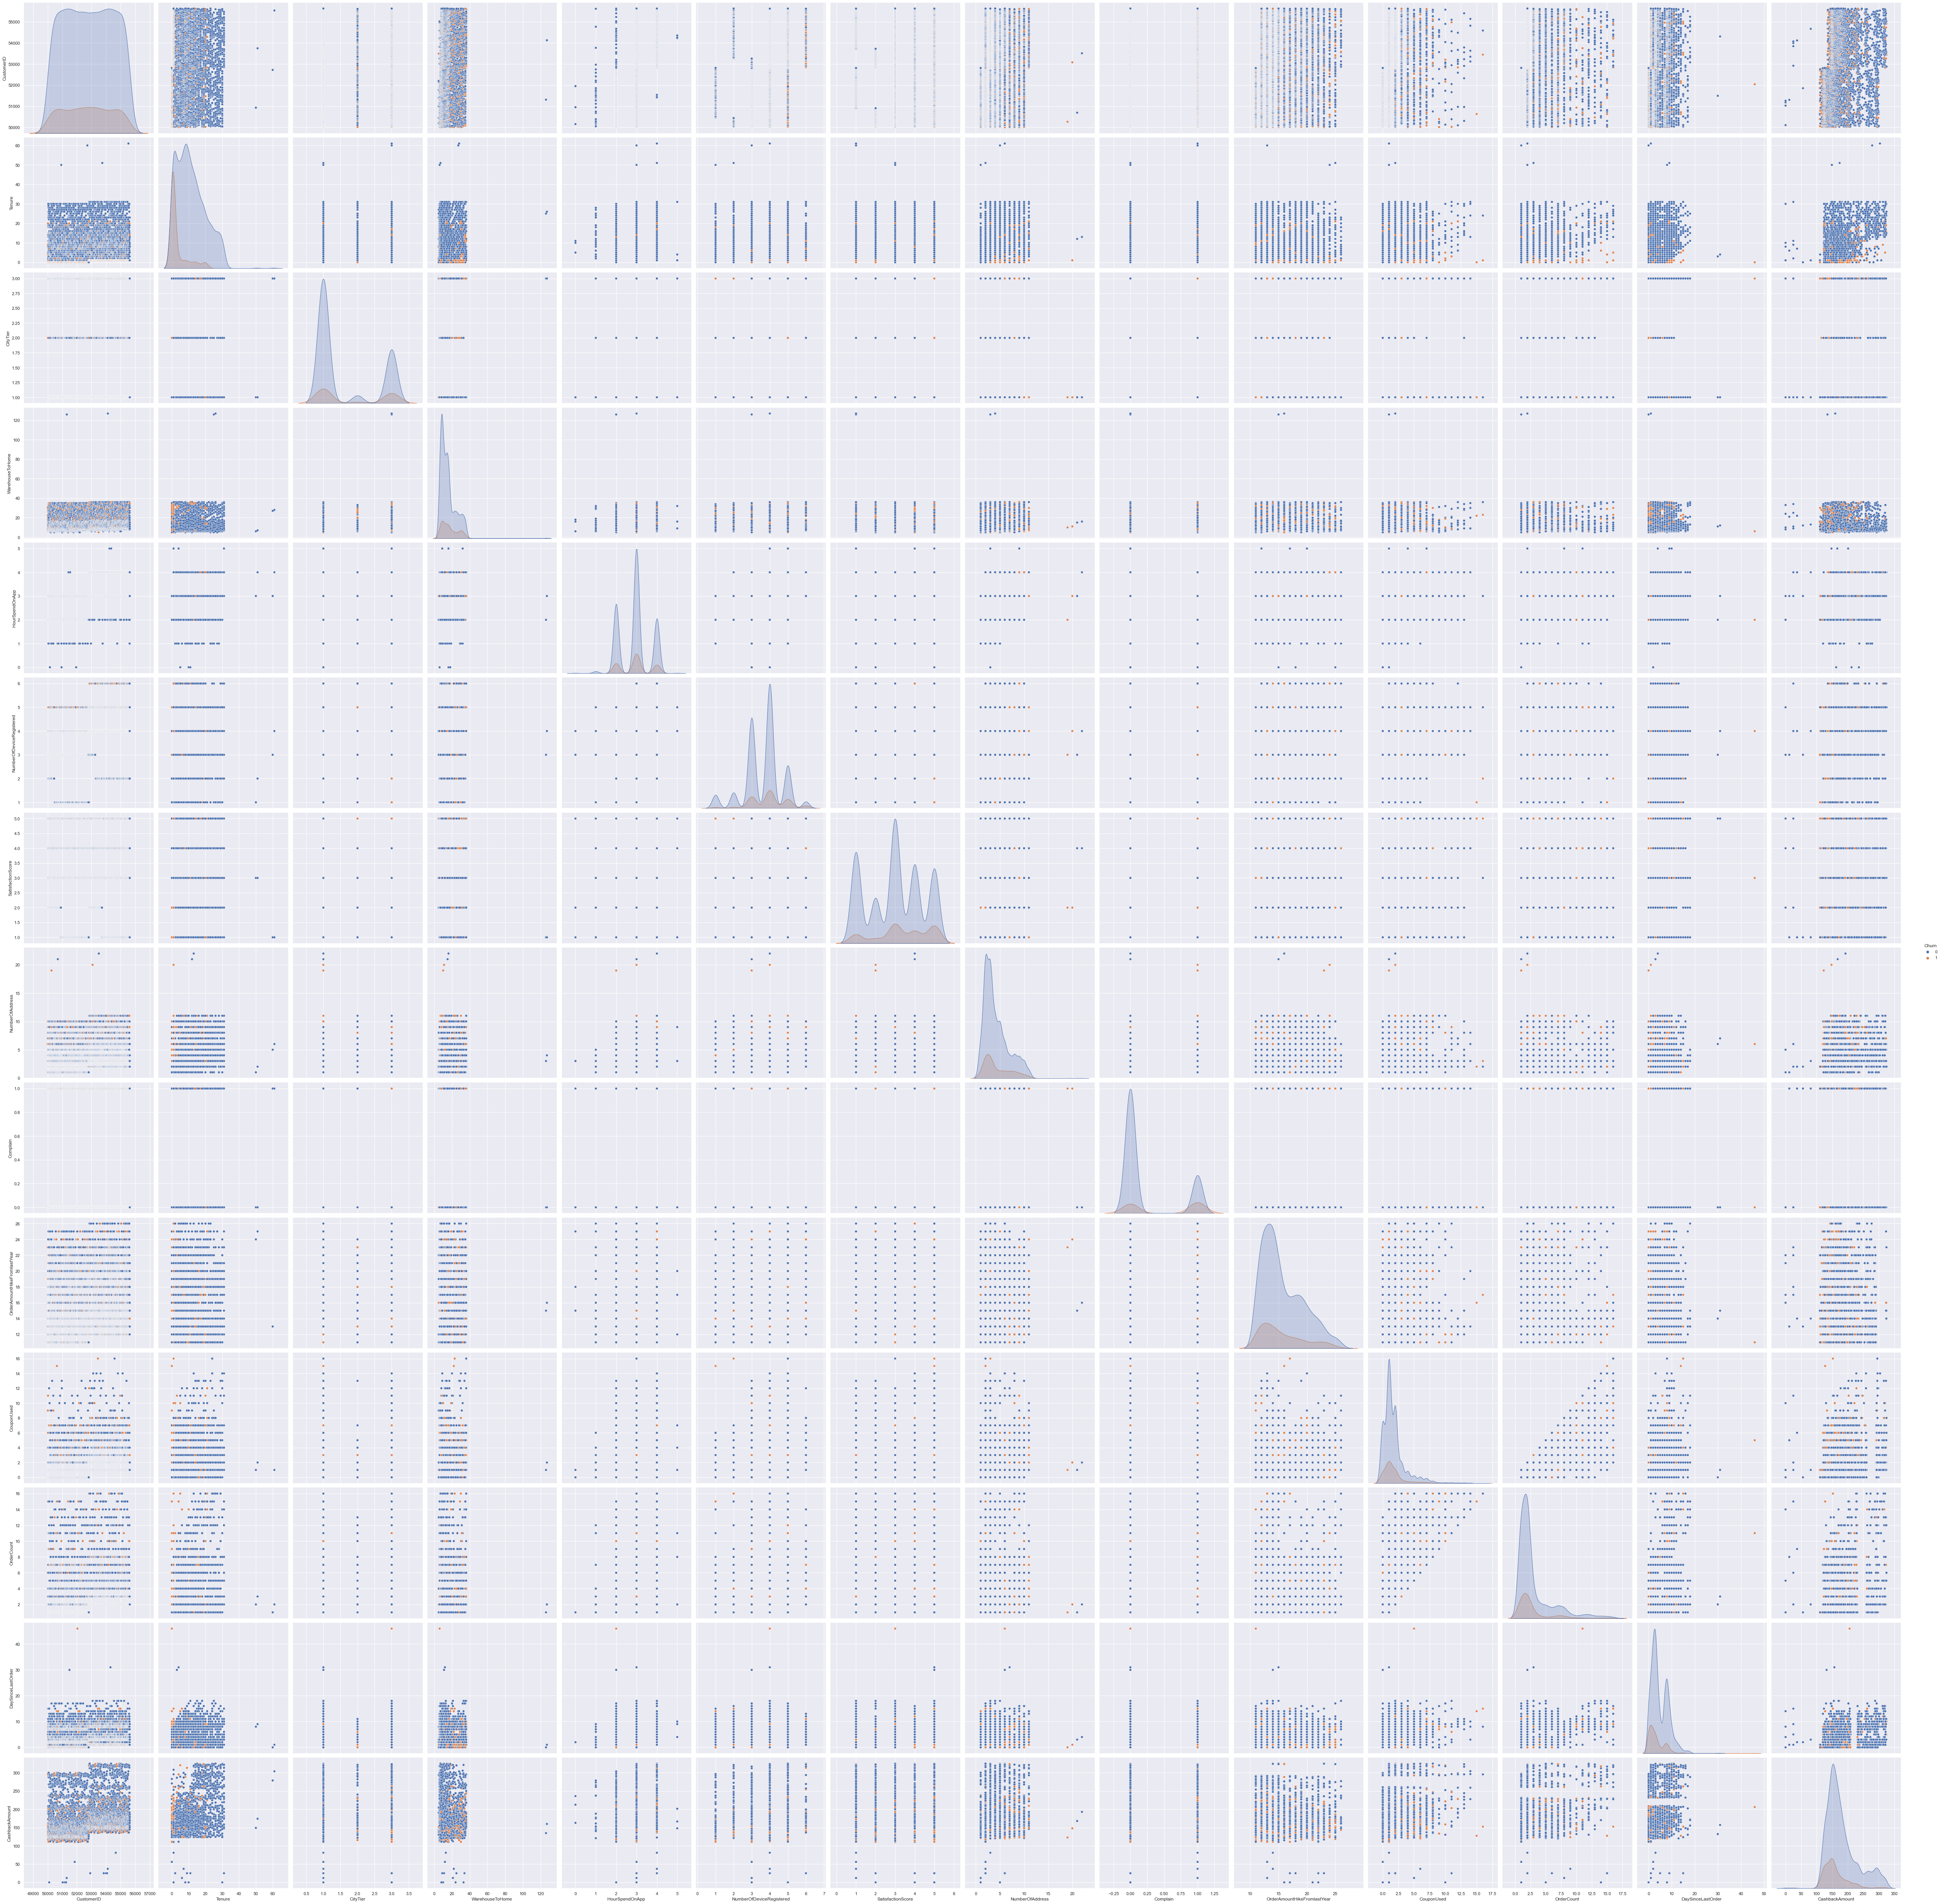

In [39]:
sns.set()
cols=df.columns
sns.pairplot(df[cols],hue='Churn', size=5)
plt.show()

Interpretasi :
Grafik diatas adalah multiple scatterplot antara banyak variable. 

⏺ Positif linear terlihat jelas  antara variabel OrderAccount dan CouponUsed yang mana jika nilai y naik begitupula dengan nilai x

<ul>Memasangkan feature numerik dan kategorikal
<li>Apakah feature categorical memiliki kolerasi dengan target?</li>
<li>Apakah ada 2 feature categorical yang terlihat jelas berkolerasi</li>

### Hypothesis Testing

In [40]:
#membuat dataset copy
ht = df.copy()
ht.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [41]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Hyphotesis Testing 1 - Complain

<ul>Hypothesis Testing to Complain
  <li>H0 : Complain not have a significant relationship with Churn</li>
  <li>H1 : Complain have a significant relationship with Churn</li>
</ul>
<i> Level of significance : 5%</i>

In [42]:
def complain (x):
    if x == 1:
        return 'Complained'
    else:   
        return 'No Complain'

In [43]:
def churn (x):
    if x == 1:
        return 'Churn'
    else:
        return 'Not Churn'

In [44]:
ht['Complain'] = ht['Complain'].apply(complain)
ht['Complain'].value_counts()

No Complain    4026
Complained     1604
Name: Complain, dtype: int64

In [45]:
ht['Churn'] = ht['Churn'].apply(churn)
ht['Churn'].value_counts()

Not Churn    4682
Churn         948
Name: Churn, dtype: int64

In [46]:
ht_group = ht.groupby(['Complain','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group

Complain      Churn  user_count
0   Complained      Churn         508
1   Complained  Not Churn        1096
2  No Complain      Churn         440
3  No Complain  Not Churn        3586

In [47]:
ht_group2 = ht.groupby(['Complain']).agg(total_user=('CustomerID','count')).reset_index()
ht_group2

Complain  total_user
0   Complained        1604
1  No Complain        4026

In [48]:
group_ratio = ht_group.merge(ht_group2,on='Complain')
group_ratio['Ratio'] = round(group_ratio['user_count']/group_ratio['total_user']*100,2)
group_ratio

Complain      Churn  user_count  total_user  Ratio
0   Complained      Churn         508        1604  31.67
1   Complained  Not Churn        1096        1604  68.33
2  No Complain      Churn         440        4026  10.93
3  No Complain  Not Churn        3586        4026  89.07

[Text(0, 0, '68.33'), Text(0, 0, '89.07')]

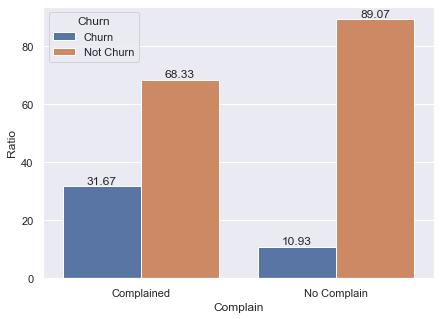

In [49]:
f,ax = plt.subplots(figsize=(7,5))
sns.barplot(data=group_ratio,
            x='Complain',
            y='Ratio',
            hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

##### <b> Chi-Squared Test </b><br>
Because the two variables are categorical.
<ul>
<li>Independence test<br><p align = 'justify'>
The test for independence might be used to asses the association between categorical variables. A chi-squared test for independence might indicate how probable it is that any observed divergence between the actual frequancies in the data and these theoretical predictions can be explained by random chance.</p></li>


Reference : <a href = 'https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/'>How to use the Chi-Squared Test for two categorical variables?</a>

In [50]:
contingency_table = pd.crosstab(df['Churn'],df['Complain'], margins=True)
print('Contingency table :\n', contingency_table)

Contingency table :
 Complain     0     1   All
Churn                     
0         3586  1096  4682
1          440   508   948
All       4026  1604  5630


<p align = 'justify'>A contingency table <i>(cross-tabulation or crosstab)</i> is type of table used in statistics to display the relationship between two categorical variables. The table is organized such that each row represents a different category of one variable, and each column represents a different category of the other variable. The intersection of a row and column contains the frequency or count of the cases that belong to both categories.</p>

In [51]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  352.41
p Value:
0.0
Degree of Freedom:      4
Expected Frequencies:
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


The critical value for the chi-squared test with a degree of freedom of 4 and alpha 0.05 is 9.488. Since the test statistic (352.41) exceeds the critical value, the null hyphotesis is rejected.

<ul>
<li>Goodness of Fit<br><p align = 'justify'>
Determine how well a theoretical model fits the observed data. In this test, the observed frequencies are compared to the expected frequencies, which are calculated from the theorretical model. The test determines if the difference between the observed and expected frequencies is significant</p></li>

In [52]:
obs_values = contingency_table.values
print('Observed Values:\n',obs_values)

Observed Values:
 [[3586 1096 4682]
 [ 440  508  948]
 [4026 1604 5630]]


In [53]:
ev = stats.chi2_contingency(contingency_table)
expected_values = ev[3]
print("Expected Values :\n",expected_values)

Expected Values :
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


In [54]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
degree_of=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",degree_of)

Degree of Freedom: 2


In [55]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 352.4051364983911


<p align = 'justify'>The critical value for the chi-square test with a degree of freedom of 2 and alpha 0.05 is 5.991. Since the test statistic (352.40) exceeds the critical value, the null hypothesis is rejected. Therefore, Complain and Churn experience have a significant variation in the distribution. This could be concluded that there is a substantial dependency of Complain on relevant experience according to the data.</p>

<b>Conclusion</b>: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true</p>

#### Hyphotesys Testing 2 - Tenure

In [56]:
ht[['Tenure']].describe()

Tenure
count  5366.000000
mean     10.189899
std       8.557241
min       0.000000
25%       2.000000
50%       9.000000
75%      16.000000
max      61.000000

<Axes: xlabel='Tenure', ylabel='CustomerID'>

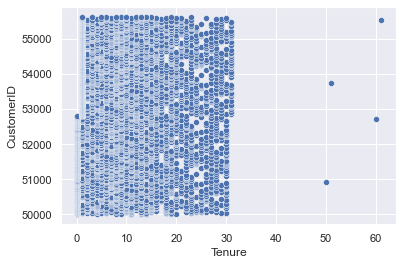

In [57]:
sns.scatterplot(data=ht, x='Tenure', y='CustomerID')

In [58]:
def group(x):
    try:
        if x['Tenure'] <= 2:
            group = 'Low'
        elif x['Tenure'] <= 16:
            group = 'Mid'
        elif x['Tenure'] >16:
            group = 'High'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['tenure_group'] = ht.apply(lambda x: group(x), axis=1)

Karena persebaran data yang sedemikian rupa, saya memutuskan untuk mengkategorikan data sebagai berikut:<br>
- Low : data dengan nilai dibawah Q2, <br>
- Mid : data dengan nilai antara Q2 dan Q3, <br>
- High : data dengan nilai di atas Q3.

In [59]:
def group(x):
    try:
        if x['Tenure'] <= ht['Tenure'].quantile(0.5):
            group = 'Low'
        elif (x['Tenure'] >= ht['Tenure'].quantile(0.5)) & (x['Tenure'] <= ht['Tenure'].quantile(0.75)):
            group = 'Mid'
        elif x['Tenure'] > ht['Tenure'].quantile(0.75):
            group = 'High'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['tenure_group'] = ht.apply(lambda x: group(x), axis=1)

In [60]:
ht.sample(3)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
5543       55544  Not Churn    10.0             Computer         1   
3319       53320  Not Churn     2.0         Mobile Phone         2   
2278       52279  Not Churn     NaN                Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
5543             16.0           Debit Card   Male             4.0   
3319             15.0          Credit Card   Male             4.0   
2278              7.0     Cash on Delivery   Male             2.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
5543                         2  ...                 4        Married   
3319                         5  ...                 2        Married   
2278                         3  ...                 5         Single   

     NumberOfAddress     Complain OrderAmountHikeFromlastYear  CouponUsed  \
5543               3  No Complain                        23.0         2.0   
3319               3  No Complain                        14.0         1.0   
2278               3  No Complain                        11.0         1.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  tenure_group  
5543         2.0                3.0          153.10           Mid  
3319         2.0                5.0          174.36           Low  
2278         1.0                2.0          120.80          None  

[3 rows x 21 columns]

In [61]:
csq_tenure = ht.groupby(['tenure_group','Churn']).size().unstack(fill_value=0)
csq_tenure.columns = ['Churn0','Churn1']
csq_tenure

Churn0  Churn1
tenure_group                
High              48    1183
Low              741    2140
Mid               78    1176

In [62]:
ct1 = stats.chisquare(csq_tenure['Churn1'])
print('Nilai Statistic Tenure :', ct1.statistic, ', dan',
      'PValue Tenure :', ct1.pvalue)

Nilai Statistic Tenure : 410.13425205601243 , dan PValue Tenure : 8.719242295763977e-90


Nilai statistic tenure adalah 1061.9584775086505 lebih besar dari 7.81 sehingga menolak H0 atau ada hubungan antara masing-masing tenure_group terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

Reference : https://van-plaosan.medium.com/uji-chi-square-menggunakan-scipy-stats-di-google-colab-7c686c1ce4bf

#### Hyphotesys Testing 3 - DaySinceLastOrder

In [63]:
ht[['DaySinceLastOrder']].describe()

DaySinceLastOrder
count        5323.000000
mean            4.543491
std             3.654433
min             0.000000
25%             2.000000
50%             3.000000
75%             7.000000
max            46.000000

In [64]:
def group(x):
    try:
        if x['DaySinceLastOrder'] <= 2:
            group = 'early'
        elif x['DaySinceLastOrder'] > 7:
            group = 'longtime'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['period'] = ht.apply(lambda x: group(x), axis=1)

Saya mengelompokkan data DaySinceLastOrder menjadi 2 bagian, sehingga saya membaginya menjadi 2 kelompok, sebagai berikut: <br>
- early : data yang bernilai di bawah Q2, <br>
- longtime : data yang bernilai di atas Q2. 

In [65]:
def group(x):
    try:
        if x['DaySinceLastOrder'] <= ht['DaySinceLastOrder'].quantile(0.5):
            group = 'early'
        elif x['DaySinceLastOrder'] > ht['DaySinceLastOrder'].quantile(0.5):
            group = 'longtime'
        else :
            group = None
        return group

    except:
        print['salah input']
ht['period'] = ht.apply(lambda x: group(x), axis=1)

In [66]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
1383       51384  Not Churn     9.0                Phone         1   
4204       54205  Not Churn     4.0             Computer         1   
3253       53254  Not Churn     1.0         Mobile Phone         3   
2613       52614  Not Churn    26.0             Computer         1   
5434       55435  Not Churn     5.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1383             11.0           Debit Card  Female             2.0   
4204              7.0          Credit Card  Female             3.0   
3253             33.0          Credit Card  Female             3.0   
2613              7.0          Credit Card  Female             2.0   
5434             36.0             E wallet  Female             4.0   

      NumberOfDeviceRegistered  ... MaritalStatus  NumberOfAddress  \
1383                         4  ...       Married               10   
4204                         4  ...        Single                3   
3253                         4  ...        Single                3   
2613                         4  ...       Married                5   
5434                         5  ...       Married                3   

         Complain  OrderAmountHikeFromlastYear CouponUsed  OrderCount  \
1383   Complained                         14.0        1.0         1.0   
4204  No Complain                         24.0        2.0         4.0   
3253  No Complain                         24.0        1.0         2.0   
2613   Complained                         20.0        1.0         1.0   
5434  No Complain                         15.0        1.0         6.0   

      DaySinceLastOrder  CashbackAmount  tenure_group    period  
1383                0.0          134.19           Low     early  
4204                8.0          165.11           Low  longtime  
3253                5.0          186.80           Low  longtime  
2613                NaN          229.65          High      None  
5434                8.0          179.68           Low  longtime  

[5 rows x 22 columns]

In [67]:
csq_DSLO = ht.groupby(['period','Churn']).size().unstack(fill_value=0)
csq_DSLO.columns = ['Churn0', 'Churn1']
csq_DSLO

Churn0  Churn1
period                  
early        604    2198
longtime     290    2231

In [68]:
cd1 = stats.chisquare(csq_DSLO['Churn1'])
print('Nilai Statistic DaySinceLastOrder  :', cd1.statistic, ', dan',
      'PValue DaySinceLastOrder :', cd1.pvalue)

Nilai Statistic DaySinceLastOrder  : 0.24587943102280424 , dan PValue DaySinceLastOrder : 0.6199915589451542


Nilai statistic tenure adalah 110.28635346756153 lebih besar dari 7.81 sehingga menolak H0 atau ada hubungan antara masing-masing period terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

Reference : https://van-plaosan.medium.com/uji-chi-square-menggunakan-scipy-stats-di-google-colab-7c686c1ce4bf

#### Hyphotesys Testing 4 - Satisfaction

Hypothesis Testing to Complain<br>
H0 : Satisfaction score do not have a significant relationship with Churn<br>
H1 : Satisfaction score have a significant relationship with Churn <br>
<i> Level of significance : 5%</i>

In [69]:
ht[['SatisfactionScore']].describe()

SatisfactionScore
count        5630.000000
mean            3.066785
std             1.380194
min             1.000000
25%             2.000000
50%             3.000000
75%             4.000000
max             5.000000

In [70]:
def group(x):
    try:
        if x['SatisfactionScore'] <= 2:
            group = 'Not Satisfy'
        elif x['SatisfactionScore'] <=3:
            group = 'Netral'
        elif x['SatisfactionScore'] >=4:
            group = 'Satisfy'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['Satisfaction_category'] = ht.apply(lambda x: group(x), axis=1)

In [71]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
4524       54525  Not Churn    11.0         Mobile Phone         1   
3311       53312  Not Churn    10.0         Mobile Phone         3   
4991       54992      Churn     1.0             Computer         1   
1941       51942  Not Churn     8.0                Phone         1   
3078       53079  Not Churn    16.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4524             17.0          Credit Card  Female             4.0   
3311              7.0           Debit Card    Male             3.0   
4991             22.0          Credit Card    Male             4.0   
1941              NaN           Debit Card  Female             2.0   
3078              7.0           Debit Card  Female             4.0   

      NumberOfDeviceRegistered  ... NumberOfAddress     Complain  \
4524                         4  ...               8  No Complain   
3311                         4  ...               3   Complained   
4991                         4  ...               3  No Complain   
1941                         1  ...               4  No Complain   
3078                         4  ...               5  No Complain   

     OrderAmountHikeFromlastYear  CouponUsed OrderCount  DaySinceLastOrder  \
4524                        21.0         2.0        2.0                4.0   
3311                        15.0         3.0        5.0               12.0   
4991                        13.0         2.0        3.0                3.0   
1941                        13.0         2.0        2.0                2.0   
3078                        17.0         2.0        2.0                3.0   

      CashbackAmount  tenure_group    period  Satisfaction_category  
4524          159.52           Mid  longtime                Satisfy  
3311          187.01           Mid  longtime            Not Satisfy  
4991          151.10           Low     early                 Netral  
1941          125.06           Low     early                 Netral  
3078          150.76           Mid     early                Satisfy  

[5 rows x 23 columns]

In [72]:
ht_group3 = ht.groupby(['Satisfaction_category','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group3

Satisfaction_category      Churn  user_count
0                Netral      Churn         292
1                Netral  Not Churn        1406
2           Not Satisfy      Churn         208
3           Not Satisfy  Not Churn        1542
4               Satisfy      Churn         448
5               Satisfy  Not Churn        1734

In [73]:
ht_group4 = ht.groupby(['Satisfaction_category']).agg(total_user=('CustomerID','count')).reset_index()
ht_group4

Satisfaction_category  total_user
0                Netral        1698
1           Not Satisfy        1750
2               Satisfy        2182

In [74]:
group_ratio1 = ht_group3.merge(ht_group4,on='Satisfaction_category')
group_ratio1['Ratio'] = round(group_ratio1['user_count']/group_ratio1['total_user']*100,2)
group_ratio1

Satisfaction_category      Churn  user_count  total_user  Ratio
0                Netral      Churn         292        1698  17.20
1                Netral  Not Churn        1406        1698  82.80
2           Not Satisfy      Churn         208        1750  11.89
3           Not Satisfy  Not Churn        1542        1750  88.11
4               Satisfy      Churn         448        2182  20.53
5               Satisfy  Not Churn        1734        2182  79.47

In [75]:
contingency_table1 = pd.crosstab(df['Churn'],ht['Satisfaction_category'], margins=True)
print('Contingency table :\n', contingency_table1)

Contingency table :
 Satisfaction_category  Netral  Not Satisfy  Satisfy   All
Churn                                                    
0                        1406         1542     1734  4682
1                         292          208      448   948
All                      1698         1750     2182  5630


In [76]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table1)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  52.064
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[1412.08454707 1455.3285968  1814.58685613 4682.        ]
 [ 285.91545293  294.6714032   367.41314387  948.        ]
 [1698.         1750.         2182.         5630.        ]]


The critical value for the chi-squared test with a degree of freedom of 6 and alpha 0.05 is 10.645. Since the test statistic (52.064) exceeds the critical value, the null hyphotesis is rejected.

Conclusion: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true. Therefore, Satisfaction score and churn have a significant variation in the distribution. This could be concluded that there is a substantial dependency of satisfaction score on relevant experience according to the data.

#### Hipotesis Testing 5 - Cashback Amount

<ul>Hypothesis Testing to Complain
  <li>H0 : CashbackAmount do not have a significant relationship with Churn</li>
  <li>H1 : CashbackAmount have a significant relationship with Churn</li>
</ul>
<i> Level of significance : 5%</i>

In [77]:
ht[['CashbackAmount']].describe()

CashbackAmount
count     5630.000000
mean       177.223030
std         49.207036
min          0.000000
25%        145.770000
50%        163.280000
75%        196.392500
max        324.990000

In [78]:
def group(x):
    try:
        if x['CashbackAmount'] <= 145.770000:
            group = 'Not Much'
        elif (x['CashbackAmount'] > 145.770000) & (x['CashbackAmount'] < 196.392500):
            group = 'Mid'
        elif x['CashbackAmount'] >=196.392500:
            group = 'A lot'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['cashback_category'] = ht.apply(lambda x: group(x), axis=1)

In [79]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
4326       54327  Not Churn    15.0         Mobile Phone         1   
1857       51858  Not Churn     NaN                Phone         1   
2167       52168  Not Churn     7.0             Computer         1   
2874       52875  Not Churn    27.0         Mobile Phone         1   
4137       54138  Not Churn    10.0             Computer         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4326             21.0           Debit Card    Male             3.0   
1857              9.0                   CC    Male             2.0   
2167              8.0           Debit Card    Male             3.0   
2874             20.0          Credit Card  Female             3.0   
4137             22.0             E wallet    Male             3.0   

      NumberOfDeviceRegistered  ...     Complain  OrderAmountHikeFromlastYear  \
4326                         4  ...  No Complain                         13.0   
1857                         4  ...  No Complain                         13.0   
2167                         3  ...  No Complain                         11.0   
2874                         3  ...  No Complain                         12.0   
4137                         6  ...  No Complain                         25.0   

     CouponUsed  OrderCount DaySinceLastOrder  CashbackAmount  tenure_group  \
4326        2.0         2.0               9.0          149.51           Mid   
1857        1.0         1.0               1.0          120.45          None   
2167        1.0         1.0               2.0          140.33           Low   
2874        2.0         2.0               4.0          169.50          High   
4137        5.0        12.0              12.0          179.06           Mid   

        period  Satisfaction_category  cashback_category  
4326  longtime                 Netral                Mid  
1857     early            Not Satisfy           Not Much  
2167     early                 Netral           Not Much  
2874  longtime                Satisfy                Mid  
4137  longtime            Not Satisfy                Mid  

[5 rows x 24 columns]

In [80]:
ht_group5 = ht.groupby(['cashback_category','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group5

cashback_category      Churn  user_count
0             A lot      Churn         154
1             A lot  Not Churn        1254
2               Mid      Churn         440
3               Mid  Not Churn        2373
4          Not Much      Churn         354
5          Not Much  Not Churn        1055

In [81]:
ht_group6 = ht.groupby(['cashback_category']).agg(total_user=('CustomerID','count')).reset_index()
ht_group6

cashback_category  total_user
0             A lot        1408
1               Mid        2813
2          Not Much        1409

In [82]:
group_ratio3 = ht_group5.merge(ht_group6,on='cashback_category')
group_ratio3['Ratio'] = round(group_ratio3['user_count']/group_ratio3['total_user']*100,2)
group_ratio3

cashback_category      Churn  user_count  total_user  Ratio
0             A lot      Churn         154        1408  10.94
1             A lot  Not Churn        1254        1408  89.06
2               Mid      Churn         440        2813  15.64
3               Mid  Not Churn        2373        2813  84.36
4          Not Much      Churn         354        1409  25.12
5          Not Much  Not Churn        1055        1409  74.88

In [83]:
contingency_table2 = pd.crosstab(df['Churn'],ht['cashback_category'], margins=True)
print('Contingency table :\n', contingency_table2)

Contingency table :
 cashback_category  A lot   Mid  Not Much   All
Churn                                         
0                   1254  2373      1055  4682
1                    154   440       354   948
All                 1408  2813      1409  5630


In [84]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table2)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  106.97
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[1170.91580817 2339.33676732 1171.74742451 4682.        ]
 [ 237.08419183  473.66323268  237.25257549  948.        ]
 [1408.         2813.         1409.         5630.        ]]


The critical value for the chi-square test with a degree of freedom of 6 and alpha 0.05 is 12.592. Since the test statistic (106.97) exceeds the critical value the null hypothesis is rejected. 

Conclusion: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true. Therefore, cashback amount and churn have a significant variation in the distribution. This could be concluded that there is a substantial dependency of cashback amount on relevant experience according to the data.

#### Hypotesis Testing 6 - City Tier

In [85]:
ht[['CityTier']].describe()

CityTier
count  5630.000000
mean      1.654707
std       0.915389
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000

In [86]:
def group(x):
    try:
        if x['CityTier'] <= 1:
            group = 'Small Population'
        elif x['CityTier'] <= 2:
            group = 'Medium Population '
        elif x['CityTier'] >= 3:
            group = 'Big Population'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['City_Tier_Category'] = ht.apply(lambda x: group(x), axis=1)

In [87]:
csq_citytier = ht.groupby(['City_Tier_Category','Churn']).size().unstack(fill_value=0)
csq_citytier.columns = ['Churn0','Churn1']
csq_citytier

Churn0  Churn1
City_Tier_Category                
Big Population         368    1354
Medium Population       48     194
Small Population       532    3134

In [88]:
contingency_table2= pd.crosstab(df['CityTier'],df['Churn'], margins=True)
print('Contingency table :\n', contingency_table2)

Contingency table :
 Churn        0    1   All
CityTier                 
1         3134  532  3666
2          194   48   242
3         1354  368  1722
All       4682  948  5630


In [89]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table2)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  40.982
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[3048.70550622  617.29449378 3666.        ]
 [ 201.25115453   40.74884547  242.        ]
 [1432.04333925  289.95666075 1722.        ]
 [4682.          948.         5630.        ]]


In [90]:
obs_values = contingency_table2.values
print('Observed Values:\n',obs_values)

Observed Values:
 [[3134  532 3666]
 [ 194   48  242]
 [1354  368 1722]
 [4682  948 5630]]


In [91]:
ev = stats.chi2_contingency(contingency_table2)
expected_values = ev[3]
print("Expected Values :\n",expected_values)

Expected Values :
 [[3048.70550622  617.29449378 3666.        ]
 [ 201.25115453   40.74884547  242.        ]
 [1432.04333925  289.95666075 1722.        ]
 [4682.          948.         5630.        ]]


In [92]:
no_of_rows=len(contingency_table2.iloc[0:4,0])
no_of_columns=len(contingency_table2.iloc[0,0:3])
degree_of=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",degree_of)

Degree of Freedom: 6


In [93]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 40.982404247736355


The critical value for the chi-squared test with a degree of freedom of 6 and alpha 0.05 is 10.645. Since the test statistic (40.982) exceeds the critical value, the null hyphotesis is rejected.
Therefore, City_Tier and churn have a significant variation in the distribution.This could be concluded that there is a substantial dependency of City_Tier on relevant experience according to the data.


#### Hypotesis Testing 7 - Warehouse To Home

In [94]:
ht[['WarehouseToHome']].describe()

WarehouseToHome
count      5379.000000
mean         15.639896
std           8.531475
min           5.000000
25%           9.000000
50%          14.000000
75%          20.000000
max         127.000000

In [95]:
def group(x):
    try:
        if x['WarehouseToHome'] <= ht['WarehouseToHome'].quantile(0.5):
            group = 'Close'
        elif (x['WarehouseToHome'] >= ht['WarehouseToHome'].quantile(0.5)) & (x['WarehouseToHome'] <= ht['WarehouseToHome'].quantile(0.75)):
            group = 'Near'
        elif x['WarehouseToHome'] > ht['WarehouseToHome'].quantile(0.75):
            group = 'Far'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['warehouse_to_home_distance'] = ht.apply(lambda x: group(x), axis=1)

In [96]:
ht.sample(3)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
1812       51813  Not Churn    10.0             Computer         3   
2341       52342  Not Churn     0.0         Mobile Phone         3   
4332       54333  Not Churn    10.0             Computer         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1812             15.0          Credit Card    Male             3.0   
2341             16.0             E wallet  Female             3.0   
4332             10.0          Credit Card    Male             2.0   

      NumberOfDeviceRegistered  ... CouponUsed  OrderCount DaySinceLastOrder  \
1812                         3  ...        1.0         7.0               7.0   
2341                         4  ...        1.0         4.0               4.0   
4332                         4  ...        3.0         8.0               3.0   

      CashbackAmount tenure_group    period  Satisfaction_category  \
1812          188.34          Mid  longtime                Satisfy   
2341          157.69          Low  longtime            Not Satisfy   
4332          145.88          Mid     early                Satisfy   

      cashback_category  City_Tier_Category  warehouse_to_home_distance  
1812                Mid      Big Population                        Near  
2341                Mid      Big Population                        Near  
4332                Mid    Small Population                       Close  

[3 rows x 26 columns]

In [97]:
csq_wthome = ht.groupby(['warehouse_to_home_distance','Churn']).size().unstack(fill_value=0)
csq_wthome.columns = ['Churn0','Churn1']
csq_wthome

Churn0  Churn1
warehouse_to_home_distance                
Close                          398    2573
Far                            274    1069
Near                           192     873

In [98]:
ct1 = stats.chisquare(csq_wthome['Churn1'])
print('Nilai Statistic Warehouse To Home :', ct1.statistic, ', dan',
      'PValue Warehouse To Home :', ct1.pvalue)

Nilai Statistic Warehouse To Home : 1149.597342192691 , dan PValue Warehouse To Home : 2.334043455520227e-250


Nilai statistic Warehouse To Home adalah 1149.597342192691 lebih besar dari 5.991 sehingga menolak H0 atau ada hubungan antara masing-masing jarak terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

<ul><b>Poin-poin yang harus diperhatikan untuk stage selanjutnya:</b><br>
<li>Mengganti tipe data yang janggal</li>
<li>Ada redundan</li>
<li>Menangani outlier pada kolom

# Data Pre-Processing <br>

<li>Missing Data</li>
<li>Duplicated Data</li>
<li>Outliers</li>
<li>Feature Transformation</li>
<li>Feature Encoding</li>
<li>Class Imbalance</li>

## Handling Duplicated Data 

In [99]:
def string_replace(df, columns, replaced):
    for col in df.columns:
        df[col] = df[col].replace(replaced)
    return df

In [100]:
replaced = {'Phone' : 'Mobile Phone',
            'Mobile' : 'Mobile Phone',
            'COD' : 'Cash on Delivery',
            'CC' : 'Credit Card'}

In [101]:
df = string_replace(df, ['PreferredLoginDevice',
                         'PreferredPaymentMode',
                         'PreferedOrderCat'],
                   replaced)

In [102]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [103]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [104]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN         Mobile Phone         1   
2          50003      1     NaN         Mobile Phone         1   
3          50004      1     0.0         Mobile Phone         3   
4          50005      1     0.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0          Credit Card    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4        Mobile Phone                  3   
2                            4        Mobile Phone                  3   
3                            4  Laptop & Accessory                  5   
4                            3        Mobile Phone                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [105]:
df.count()

CustomerID                     5630
Churn                          5630
Tenure                         5366
PreferredLoginDevice           5630
CityTier                       5630
WarehouseToHome                5379
PreferredPaymentMode           5630
Gender                         5630
HourSpendOnApp                 5375
NumberOfDeviceRegistered       5630
PreferedOrderCat               5630
SatisfactionScore              5630
MaritalStatus                  5630
NumberOfAddress                5630
Complain                       5630
OrderAmountHikeFromlastYear    5365
CouponUsed                     5374
OrderCount                     5372
DaySinceLastOrder              5323
CashbackAmount                 5630
dtype: int64

In [106]:
df.duplicated(subset=['CustomerID','Tenure'])

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Length: 5630, dtype: bool

In [107]:
df.duplicated(subset=['CustomerID','Tenure']).sum()

0

## Handling Missing Data

In [108]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [109]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Tenure

In [110]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df = df.reset_index()
print(df['Tenure'])

0        4.0
1        9.0
2        9.0
3        0.0
4        0.0
        ... 
5625    10.0
5626    13.0
5627     1.0
5628    23.0
5629     8.0
Name: Tenure, Length: 5630, dtype: float64


Missing value pada feature Tenure tidak didrop meskipun presentasenya <10% sebab ada 81 data Tenure yang NaN dan Churn nya 1, kalau didrop data yang Churnnya 1 akan semakin sedikit mengingat data yang memiliki nilai 1 di Churn hanya 18% dari total data di feature Churn. Nilai Median dipilih untuk mengisi missing value agar distribusi data nya terjaga tetap normal

### WarehouseToHome

In [111]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df = df.reset_index()
print(df['WarehouseToHome'])

0        6.0
1        8.0
2       30.0
3       15.0
4       12.0
        ... 
5625    30.0
5626    13.0
5627    11.0
5628     9.0
5629    15.0
Name: WarehouseToHome, Length: 5630, dtype: float64


Ada 251 data WarehouseToHome yang missing dan 84 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### HourSpendOnApp

In [112]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df = df.reset_index(drop=True)
print(df['HourSpendOnApp'])

0       3.000000
1       3.000000
2       2.000000
3       2.000000
4       2.931535
          ...   
5625    3.000000
5626    3.000000
5627    3.000000
5628    4.000000
5629    3.000000
Name: HourSpendOnApp, Length: 5630, dtype: float64


Ada 255 data HourSpendonApp yang missing dan 58 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### OrderAmountHikeFromLastYear

In [113]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df = df.reset_index(drop=True)
print(df['OrderAmountHikeFromlastYear'])

0       11.0
1       15.0
2       14.0
3       23.0
4       11.0
        ... 
5625    18.0
5626    16.0
5627    21.0
5628    15.0
5629    13.0
Name: OrderAmountHikeFromlastYear, Length: 5630, dtype: float64


Ada 251 data OrderAmountHikeFromlastYear yang missing dan 14 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### CouponUsed

In [114]:
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())
df['CouponUsed'] = df['CouponUsed'].reset_index(drop=True)
print(df['CouponUsed'])

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5625    1.0
5626    1.0
5627    1.0
5628    2.0
5629    2.0
Name: CouponUsed, Length: 5630, dtype: float64


Ada 248 data CouponUsed yang missing dan 8 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### OrderCount

In [115]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df = df.reset_index(drop=True)
print(df['OrderCount'])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    2.0
5626    2.0
5627    2.0
5628    2.0
5629    2.0
Name: OrderCount, Length: 5630, dtype: float64


Ada 254 data OrderCount yang missing dan 18 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### DaySinceLastOrder

In [116]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())
df = df.reset_index(drop=True)
print(df['DaySinceLastOrder'])

0       5.0
1       0.0
2       3.0
3       3.0
4       3.0
       ... 
5625    4.0
5626    3.0
5627    4.0
5628    9.0
5629    3.0
Name: DaySinceLastOrder, Length: 5630, dtype: float64


Ada 307 data DaySinceLastOrder yang missing dan 54 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

In [117]:
df.isna().sum()

level_0                        0
index                          0
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Setelah dilakukan data preprocessing, DataFrame sudah bebas dari missing value.

<h2>Feature Transformation</h2>


In [118]:
nf = df.drop(['level_0','index','CustomerID',
                                    'Churn','CityTier','SatisfactionScore',
                                    'Complain'],axis=1)

In [119]:
nf = nf.select_dtypes(include = 'number')

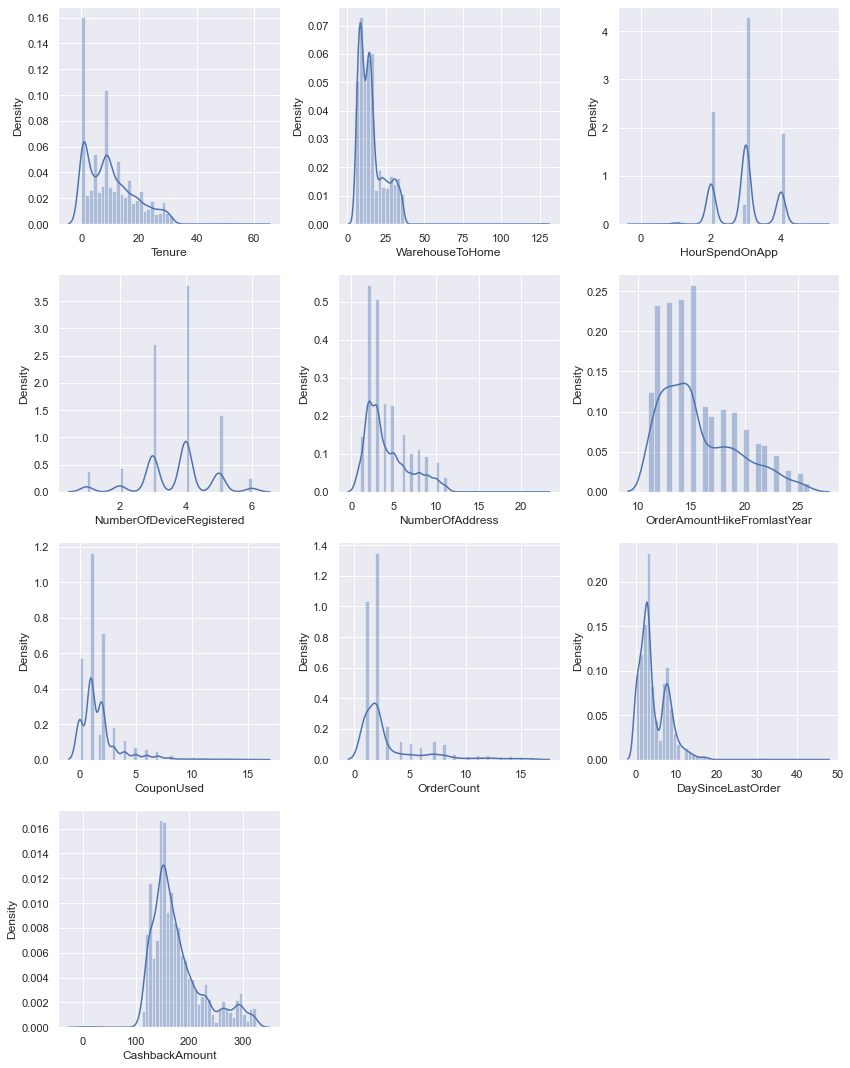

In [120]:
num = nf.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(nf[num[i]])
plt.tight_layout()
plt.show()

<p align = 'justify'>
<i>Normal distribution</i> is a very important distribution in Statistics, but usually the features in the real-life data are not normally distributed.

<ul>Transformations present in scikit-learn:
    <li>Function Transformation</li>
    <ul><i>Log Transformation</i>
        <li>Mostly applied to right-skewed data</li>
        <li>Make data close to a normal distribution but not able to exactly abide by a normal distribution</li>
        <li>Convert data from additive scale to multiplicative scale</li>
        <li>Not applied to those feature which have negative</li>
    </ul>
    <ul><i>Reciprocal Transformation</i>
        <li>Not defined for zero</li>
        <li>Radical effect</li>
        <li>Reverses the order among values of the same sign</li>
    </ul>
    <ul><i>Square and Squareroot Transformation</i>
        <li>Left-skewed data (Square Transformation</li>
        <li>Defined only for positive number</li>
        <li>Can be used for reducing the skewness of right-skewed data</li>
    </ul>
<li>Power Transformation</li>
    <ul>
        <li>Output is more 'Gaussian' like</li>
        <li>Box-cox and Yeo-johnson transforms</li>
        <li>Box-cox requires the input data to be strictly positive (not even zero is acceptable)</li>
        <li>Yeo-johnson accep zero and negatives
<li>Quantile Transformation</li>


Reference : <a href='https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/'>Feature Transformation in Data Science</a>

<h3> Power Transform </h3>

In [121]:
powt = nf

In [122]:
from sklearn.preprocessing import PowerTransformer

#create the power transformer object
pt = PowerTransformer()

#fit and transform
df_transformed = pt.fit_transform(powt)

#dataframe of transformed data
df_transformed_df = pd.DataFrame(df_transformed, 
                                 columns=nf.columns)

print('Original Data: \n', nf)
print('Transformed Data: \n', df_transformed_df)

Original Data: 
       Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0        4.0              6.0        3.000000                         3   
1        9.0              8.0        3.000000                         4   
2        9.0             30.0        2.000000                         4   
3        0.0             15.0        2.000000                         4   
4        0.0             12.0        2.931535                         3   
...      ...              ...             ...                       ...   
5625    10.0             30.0        3.000000                         2   
5626    13.0             13.0        3.000000                         5   
5627     1.0             11.0        3.000000                         2   
5628    23.0              9.0        4.000000                         5   
5629     8.0             15.0        3.000000                         2   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0   

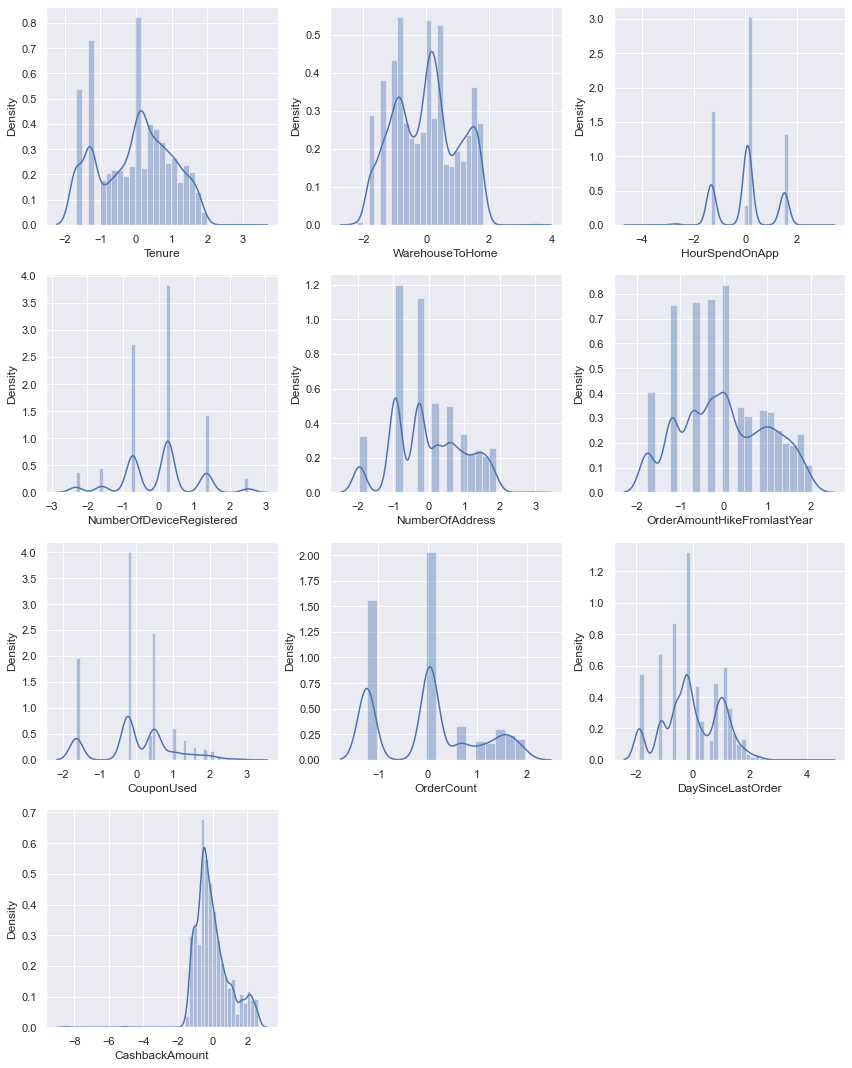

In [123]:
tf = df_transformed_df.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(tf)):
    plt.subplot(4, int(len(tf)/3), i+1)
    sns.distplot(df_transformed_df[tf[i]])
plt.tight_layout()
plt.show()

<Axes: >

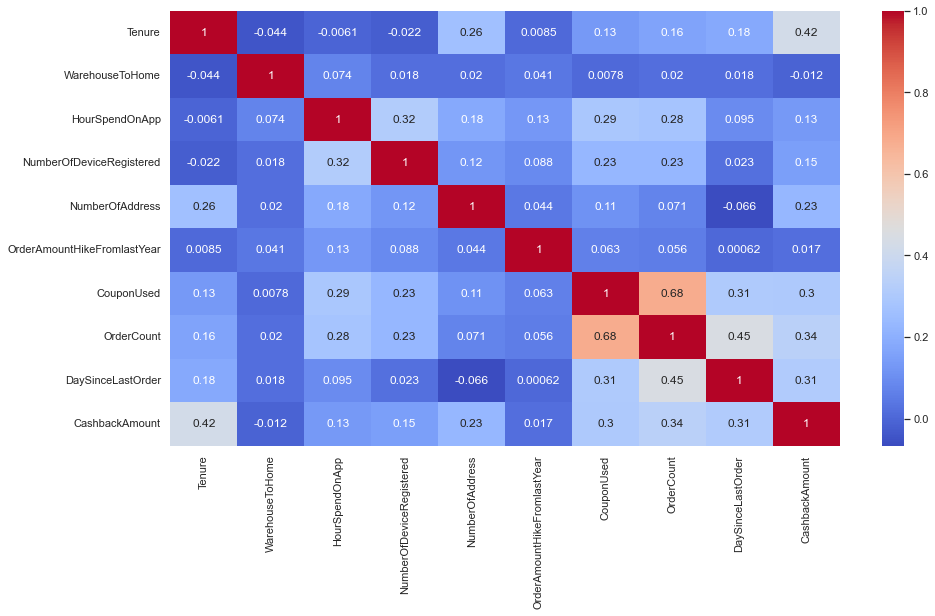

In [124]:
plt.figure(figsize=(15,8))
corr = df_transformed_df.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Log Transformation</h3>

In [125]:
df_log = np.log(nf)
print(df_log)

        Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     1.386294         1.791759        1.098612                  1.098612   
1     2.197225         2.079442        1.098612                  1.386294   
2     2.197225         3.401197        0.693147                  1.386294   
3         -inf         2.708050        0.693147                  1.386294   
4         -inf         2.484907        1.075526                  1.098612   
...        ...              ...             ...                       ...   
5625  2.302585         3.401197        1.098612                  0.693147   
5626  2.564949         2.564949        1.098612                  1.609438   
5627  0.000000         2.397895        1.098612                  0.693147   
5628  3.135494         2.197225        1.386294                  1.609438   
5629  2.079442         2.708050        1.098612                  0.693147   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount 

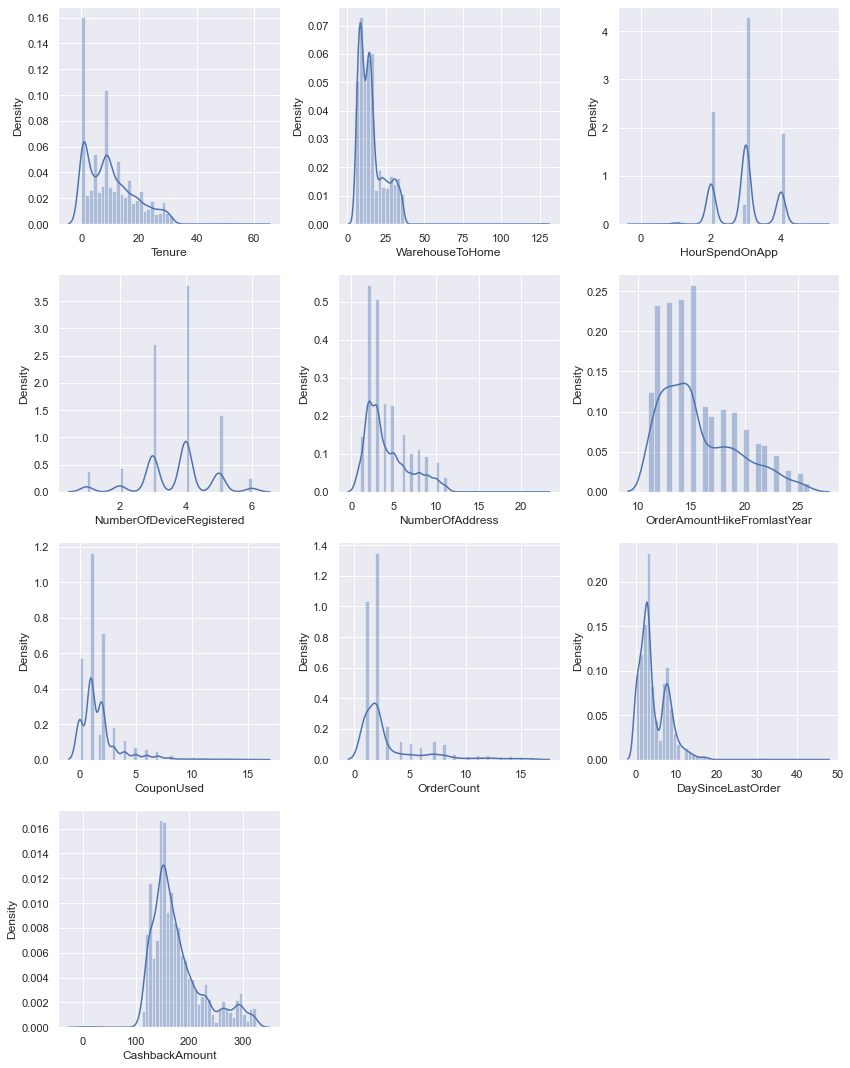

In [126]:
logf = df_log.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(df[logf[i]])
plt.tight_layout()
plt.show()

<Axes: >

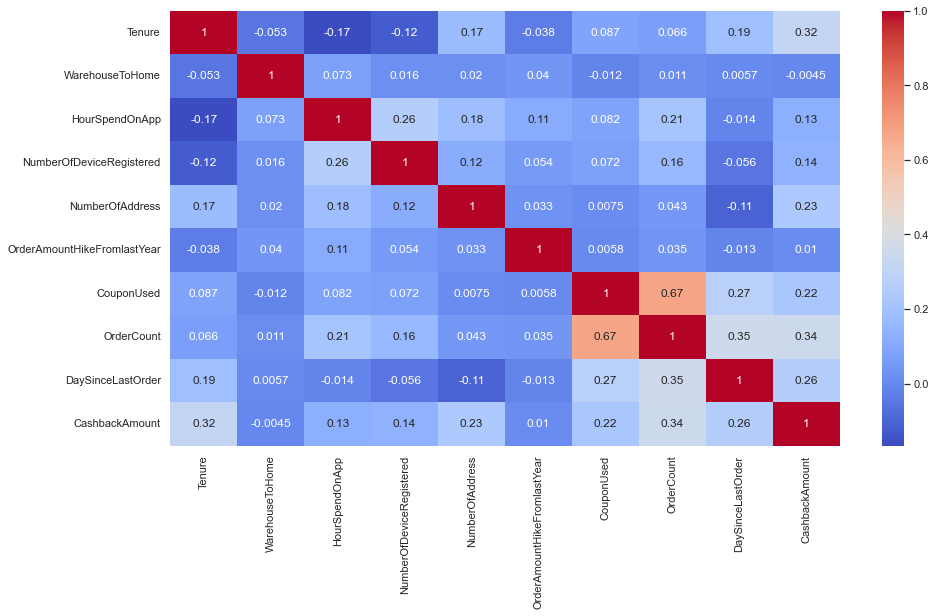

In [127]:
plt.figure(figsize=(15,8))
corr = df_log.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Square Root</h3>

In [128]:
df_sqrt= np.sqrt(nf)
print(df_sqrt)

        Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     2.000000         2.449490        1.732051                  1.732051   
1     3.000000         2.828427        1.732051                  2.000000   
2     3.000000         5.477226        1.414214                  2.000000   
3     0.000000         3.872983        1.414214                  2.000000   
4     0.000000         3.464102        1.712173                  1.732051   
...        ...              ...             ...                       ...   
5625  3.162278         5.477226        1.732051                  1.414214   
5626  3.605551         3.605551        1.732051                  2.236068   
5627  1.000000         3.316625        1.732051                  1.414214   
5628  4.795832         3.000000        2.000000                  2.236068   
5629  2.828427         3.872983        1.732051                  1.414214   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount 

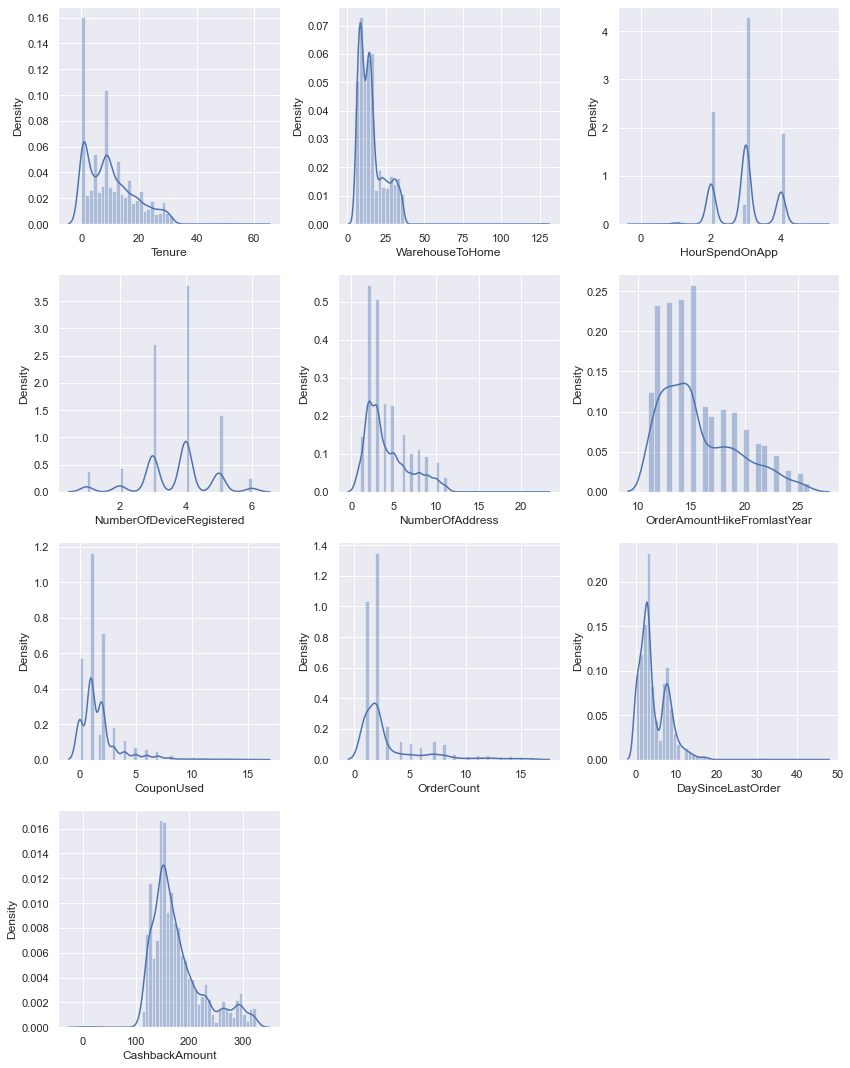

In [129]:
sqrttf = df_sqrt.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(df[sqrttf[i]])
plt.tight_layout()
plt.show()

<Axes: >

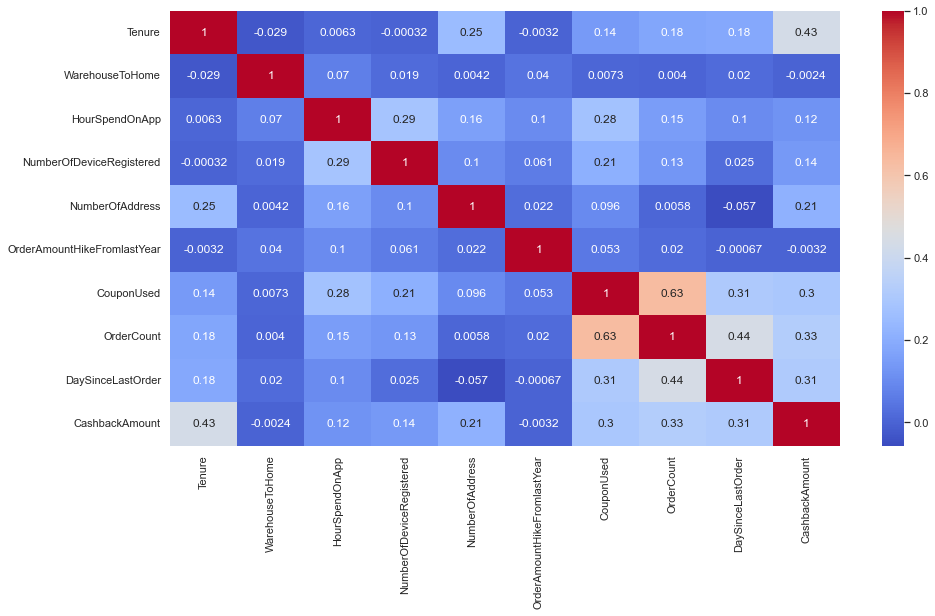

In [130]:
plt.figure(figsize=(15,8))
corr = df_sqrt.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Skewness and Kurtoses</h3>

#Measures of Skewness and Kurtosis in Python<br>
As rule of thumb, skewness can be interpreted like this: 
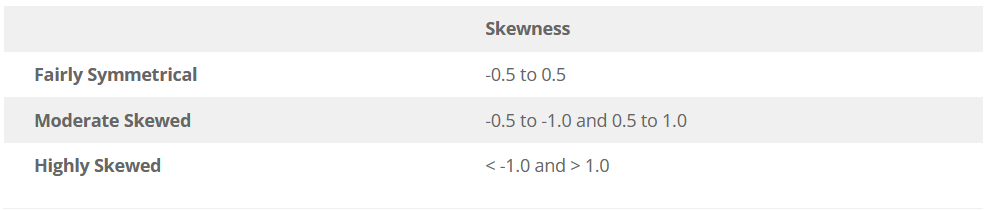


source : https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

The measure of Kurtosis refers to the tailedness of a distribution. Tailedness refres how often the outliers occur. Excess kurtosis irelative to a normal distribution.<br>
Peakedness in a data distribution is the degree to which data values are concentrated around the mean. Datasets with high kurtosis tend to have a distinct peak near the mean, decline rapidly, and have heavy tails. Datasets with low kurtosis tend to have a flat top near the mean rather than a sharp peak.<br>
A large kurtosis indicates that there are high probabilities, on the other hand, a small kurtosis signals that the probabilities low.<br>
source : https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#What_Is_Skewness?

In [131]:
#Measure skewed before features being transformed
skewkurtosis_before = nf.agg(['skew', 'kurtosis']).transpose()
print(skewkurtosis_before)

                                 skew   kurtosis
Tenure                       0.773278   0.154613
WarehouseToHome              1.678346  10.606302
HourSpendOnApp              -0.027850  -0.556346
NumberOfDeviceRegistered    -0.396969   0.582849
NumberOfAddress              1.088639   0.959229
OrderAmountHikeFromlastYear  0.835439  -0.125375
CouponUsed                   2.605547   9.709842
OrderCount                   2.276640   5.147816
DaySinceLastOrder            1.273530   4.405103
CashbackAmount               1.149846   0.974505


Based on our measurement above, we know that: <br>
- Features that has Fairly symmetrical are CustomerID, HoursSpendOnApp,NumberOfDeviceRegistered<br>
- Features that has Moderate skewed are WarehouseHome, HourSpendOnApp, NumberOfDeviceRegsitered, SatisfactionScore, DaysSinceLastOrder,CashbackAmount,Complain, OrderAmountHikeFromLastYear,Tenure,CitiTier<br>
- Features that has Highly skewed are Churn, NumberOfAddress,CouponUsed,OrderCount

In [132]:
#Measure skewed after features being transformed with power transform
measure_pow= df_transformed_df.agg(['skew', 'kurtosis']).transpose()
print(measure_pow)

                                 skew  kurtosis
Tenure                      -0.132599 -0.966195
WarehouseToHome              0.047854 -0.943150
HourSpendOnApp              -0.029347 -0.554864
NumberOfDeviceRegistered     0.015066  0.284061
NumberOfAddress              0.028398 -0.732866
OrderAmountHikeFromlastYear  0.082174 -0.919048
CouponUsed                   0.002656 -0.119687
OrderCount                   0.224301 -0.977704
DaySinceLastOrder           -0.032944 -0.577978
CashbackAmount               0.264961  4.234709


In [133]:
#Measure skewed after features being log transformed
Measure_log= df_log.agg(['skew', 'kurtosis']).transpose()
print(Measure_log)

                                 skew  kurtosis
Tenure                            NaN       NaN
WarehouseToHome              0.238748 -0.819931
HourSpendOnApp                    NaN       NaN
NumberOfDeviceRegistered    -1.829466  4.397483
NumberOfAddress             -0.052713 -0.596081
OrderAmountHikeFromlastYear  0.471376 -0.682048
CouponUsed                        NaN       NaN
OrderCount                   0.845751 -0.041419
DaySinceLastOrder                 NaN       NaN
CashbackAmount                    NaN       NaN


In [134]:
#Measure skewed after features being squareroot transformed
Measure_sqrt= df_sqrt.agg(['skew', 'kurtosis']).transpose()
print(Measure_sqrt)

                                 skew  kurtosis
Tenure                      -0.217301 -0.752551
WarehouseToHome              0.718383  0.396101
HourSpendOnApp              -0.513054  1.568102
NumberOfDeviceRegistered    -1.058352  1.889047
NumberOfAddress              0.539377 -0.448600
OrderAmountHikeFromlastYear  0.651888 -0.448123
CouponUsed                   0.229209  0.697077
OrderCount                   1.548127  1.862038
DaySinceLastOrder           -0.170560 -0.092171
CashbackAmount               0.526796  2.611582


After being transformed, skew got  nearer to normal distribution

<h2>Feature Encoding</h2>

<p align = 'justify'>
Mengubah feature Catergorical menjadi Numerical
    
<li>Teknik Label Encoding, digunakan jika feature dengan variabel yang memiliki urutan/peringkat.</li>
<li>Teknik One-Hot-Encoding, digunakan jika feature dengan variabel hanyalah nama dan tidak ada urutan atau peringkat pada feature variabel ini.</li>

<a href='https://medium.com/nerd-for-tech/nominal-and-ordinal-encoding-in-data-science-c93872601f16'>Referensi aturan Feature Encoding</a>

<h3>PreferredLoginDevice</h3>

In [135]:
df_PreferredLoginDevice=pd.get_dummies(df['PreferredLoginDevice'], prefix='PreferredLoginDevice')
df_PreferredLoginDevice.head(4)

PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone
0                              0                                  1
1                              0                                  1
2                              0                                  1
3                              0                                  1

<h3>PreferredPaymentMode</h3>

In [136]:
df_PreferredPaymentMode=pd.get_dummies(df['PreferredPaymentMode'], prefix='PreferredPaymentMode')
df_PreferredPaymentMode.head(4)

PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                1                              0   
1                                0                              0   
2                                1                              0   
3                                1                              0   

   PreferredPaymentMode_UPI  
0                         0  
1                         1  
2                         0  
3                         0

<h3>Gender</h3>

In [137]:
mapping_gender={
    'Male':0,
    'Female':1
}
df_gender=df['Gender'].map(mapping_gender)
df_gender.head(4)

0    1
1    0
2    0
3    0
Name: Gender, dtype: int64

<h3>PreferedOrderCat</h3>

In [138]:
df_POC=pd.get_dummies(df['PreferedOrderCat'], prefix='Prefered Order Category')
df_POC.head(5)

Prefered Order Category_Fashion  Prefered Order Category_Grocery  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Prefered Order Category_Laptop & Accessory  \
0                                           1   
1                                           0   
2                                           0   
3                                           1   
4                                           0   

   Prefered Order Category_Mobile Phone  Prefered Order Category_Others  
0                                     0                               0  
1                                     1                               0  
2                                     1                               0  
3                                     0                               0  
4                                     1                               0

<h3>MaritalStatus</h3>

In [139]:
df_MS=pd.get_dummies(df['MaritalStatus'],prefix='Marital Status')
df_MS.head(5)

Marital Status_Divorced  Marital Status_Married  Marital Status_Single
0                        0                       0                      1
1                        0                       0                      1
2                        0                       0                      1
3                        0                       0                      1
4                        0                       0                      1

<h3>Merge Encoding</h3>

In [140]:
#MERGE COLUMN ENCODING
df_PreferredLoginDevice = df_PreferredLoginDevice.reset_index(drop=True)
df_PreferredPaymentMode = df_PreferredPaymentMode.reset_index(drop=True)
df_gender = df_gender.reset_index(drop=True)
#preferedordercat
#Maritalstatus

merged_encoding = pd.concat([df_PreferredLoginDevice, df_PreferredPaymentMode,df_gender], axis=1)
merged_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   PreferredLoginDevice_Computer          5630 non-null   uint8
 1   PreferredLoginDevice_Mobile Phone      5630 non-null   uint8
 2   PreferredPaymentMode_Cash on Delivery  5630 non-null   uint8
 3   PreferredPaymentMode_Credit Card       5630 non-null   uint8
 4   PreferredPaymentMode_Debit Card        5630 non-null   uint8
 5   PreferredPaymentMode_E wallet          5630 non-null   uint8
 6   PreferredPaymentMode_UPI               5630 non-null   uint8
 7   Gender                                 5630 non-null   int64
dtypes: int64(1), uint8(7)
memory usage: 82.6 KB


In [141]:
merged_encoding.sample(4)

PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  \
1802                              1                                  0   
4190                              0                                  1   
5349                              0                                  1   
1215                              0                                  1   

      PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
1802                                      0                                 0   
4190                                      0                                 1   
5349                                      0                                 1   
1215                                      1                                 0   

      PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
1802                                0                              1   
4190                                0                              0   
5349                                0                              0   
1215                                0                              0   

      PreferredPaymentMode_UPI  Gender  
1802                         0       0  
4190                         0       0  
5349                         0       0  
1215                         0       1

<h2>Merge Feature</h2>

<h3>df with encoding</h3>

In [142]:
df = df.drop(['level_0','index',
             'PreferredLoginDevice',
             'PreferredPaymentMode',
             'Gender',
             'PreferedOrderCat',
             'MaritalStatus'],axis=1)

In [143]:
rf_feature = pd.concat([df,merged_encoding],axis=1)
rf_feature.head(2)

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       50001      1     4.0         3              6.0             3.0   
1       50002      1     9.0         1              8.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   

   ...  DaySinceLastOrder  CashbackAmount  PreferredLoginDevice_Computer  \
0  ...                5.0          159.93                              0   
1  ...                0.0          120.90                              0   

   PreferredLoginDevice_Mobile Phone  PreferredPaymentMode_Cash on Delivery  \
0                                  1                                      0   
1                                  1                                      0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                 0                                1   
1                                 0                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender  
0                              0                         0       1  
1                              0                         1       0  

[2 rows x 23 columns]

<h3>transformation and encoding</h3>

In [144]:
df2 = df[['CustomerID','Churn','CityTier','SatisfactionScore','Complain']]
df2.head(2)

CustomerID  Churn  CityTier  SatisfactionScore  Complain
0       50001      1         3                  2         1
1       50002      1         1                  3         1

In [145]:
features = pd.concat([df2,df_transformed_df,merged_encoding],axis=1)
features.head(2)

CustomerID  Churn  CityTier  SatisfactionScore  Complain    Tenure  \
0       50001      1         3                  2         1 -0.582398   
1       50002      1         1                  3         1  0.132848   

   WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  NumberOfAddress  \
0        -1.761459        0.097388                 -0.721612         1.553861   
1        -1.095000        0.097388                  0.260014         1.143982   

   ...  DaySinceLastOrder  CashbackAmount  PreferredLoginDevice_Computer  \
0  ...           0.395489       -0.292848                              0   
1  ...          -1.866945       -1.246617                              0   

   PreferredLoginDevice_Mobile Phone  PreferredPaymentMode_Cash on Delivery  \
0                                  1                                      0   
1                                  1                                      0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                 0                                1   
1                                 0                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender  
0                              0                         0       1  
1                              0                         1       0  

[2 rows x 23 columns]

<h2> Data Splitting </h2>

In [146]:
#make dataset for splitting
X = features.drop(['Churn'],axis=1)
y = features[['Churn','CustomerID']]

In [147]:
#splitting the data into Train and Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
print('dataset shape :',df.shape)
print('X train :',Xtrain.shape)
print('X test :',Xtest.shape)
print('y train :',ytrain.shape)
print('y test :',ytest.shape)

dataset shape : (5630, 15)
X train : (3941, 22)
X test : (1689, 22)
y train : (3941, 2)
y test : (1689, 2)


In [149]:
ytest = ytest.drop(['CustomerID'],axis=1)

In [150]:
train = pd.merge(Xtrain, ytrain, on='CustomerID')
train.sample(2)

CustomerID  CityTier  SatisfactionScore  Complain    Tenure  \
867       55185         1                  3         0  1.198493   
870       54021         1                  3         0  0.897681   

     WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
867        -0.831335        0.097388                  0.260014   
870        -0.047100        0.097388                  1.343815   

     NumberOfAddress  OrderAmountHikeFromlastYear  ...  CashbackAmount  \
867         0.582315                     0.027623  ...        2.210051   
870         1.553861                     0.027623  ...        2.542830   

     PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  \
867                              0                                  1   
870                              0                                  1   

     PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
867                                      0                                 1   
870                                      0                                 1   

     PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
867                                0                              0   
870                                0                              0   

     PreferredPaymentMode_UPI  Gender  Churn  
867                         0       1      0  
870                         0       1      0  

[2 rows x 23 columns]

## Handling Outliers

### DaySinceLastOrder

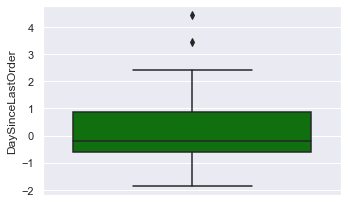

In [151]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['DaySinceLastOrder'],color='green', orient='v')
plt.tight_layout()
plt.show()

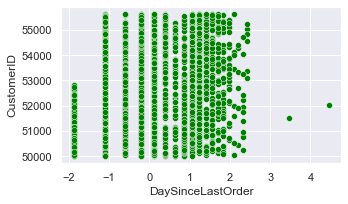

In [152]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['DaySinceLastOrder'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Dari visualisasi di atas dapat dilihat hanya ada sebagian kecil nilai yang jauh dari distribusi sehingga menjadi nilai pencilan atau bisa di bilang nilainya di atas 20.

In [153]:
odslo = train[train['DaySinceLastOrder']>20]
odslo

Empty DataFrame
Columns: [CustomerID, CityTier, SatisfactionScore, Complain, Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, PreferredLoginDevice_Computer, PreferredLoginDevice_Mobile Phone, PreferredPaymentMode_Cash on Delivery, PreferredPaymentMode_Credit Card, PreferredPaymentMode_Debit Card, PreferredPaymentMode_E wallet, PreferredPaymentMode_UPI, Gender, Churn]
Index: []

[0 rows x 23 columns]

Dari keterangan di atas dapat dilihat bahwa hanya ada 1 customer yang churn dan nilai DaySinceLastOrder nya paling jauh yakni 46 hari. Saya dapat berasumsi kalau customer tersebut memang sudah tidak berlangganan dengan kita lagi sehingga saya akan mengeleminasi customer tersebut dan mengubah nilai yang masih belum churn menjadi nilai dari High Limit DaySinceLastOrder(Q3 + (1.5 x IQR)).

In [154]:
train = train.drop(train[train['DaySinceLastOrder']>31].index, axis=0)
odslo = train[train['DaySinceLastOrder']>20]
odslo

Empty DataFrame
Columns: [CustomerID, CityTier, SatisfactionScore, Complain, Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, PreferredLoginDevice_Computer, PreferredLoginDevice_Mobile Phone, PreferredPaymentMode_Cash on Delivery, PreferredPaymentMode_Credit Card, PreferredPaymentMode_Debit Card, PreferredPaymentMode_E wallet, PreferredPaymentMode_UPI, Gender, Churn]
Index: []

[0 rows x 23 columns]

Customer dengan nilai DaySinceLastOrder 46 days telah hilang, sekarang tinggal mengubah nilai yang masih di atas 20 menjadi High Limit.

In [155]:
q1dslo = train['DaySinceLastOrder'].quantile(0.25)
q3dslo = train['DaySinceLastOrder'].quantile(0.75)
iqrdslo = q3dslo - q1dslo
highlimit_dslo = q3dslo + (iqrdslo * 1.5)
print ('Nilai High Limit dari DaySinceLastOrder adalah', highlimit_dslo)

Nilai High Limit dari DaySinceLastOrder adalah 3.0210586778695028


In [156]:
train['DaySinceLastOrder'] = train['DaySinceLastOrder'].mask(train['DaySinceLastOrder']>20, highlimit_dslo)

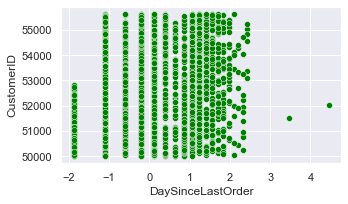

In [157]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['DaySinceLastOrder'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

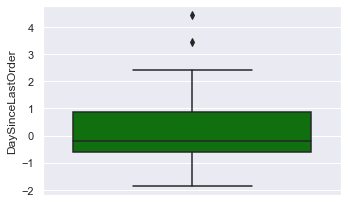

In [158]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['DaySinceLastOrder'],color='green', orient='v')
plt.tight_layout()
plt.show()

Masih ada beberapa pencilan dari DaySinceLastOrder tapi bukan menjadi masalah, itu hanya terjadi karena banyaknya distribusi nilai di tengah2 sehingga seakan-akan terlihat ada outliers.

### HourSpendOnApp

<Axes: >

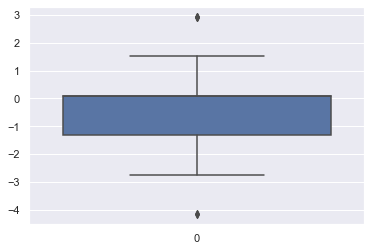

In [159]:
sns.boxplot(train['HourSpendOnApp'])

In [160]:
percentile25 = train['HourSpendOnApp'].quantile(0.25)
percentile75 = train['HourSpendOnApp'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.4183173098551802

In [161]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2.2248641745711293
Lower limit -3.4484050648495925


In [162]:
train[train['HourSpendOnApp'] > upper_limit]
train[train['HourSpendOnApp'] < lower_limit]
train.loc[:,['HourSpendOnApp']]

HourSpendOnApp
0          -1.320929
1          -1.320929
2           0.000328
3           0.097388
4           0.097388
...              ...
3936        1.514418
3937        0.097388
3938        0.097388
3939        1.514418
3940        0.097388

[3941 rows x 1 columns]

In [163]:
train = train[train['HourSpendOnApp'] < upper_limit]
train = train[train['HourSpendOnApp'] != 0]
train.shape

(3938, 23)

<Axes: >

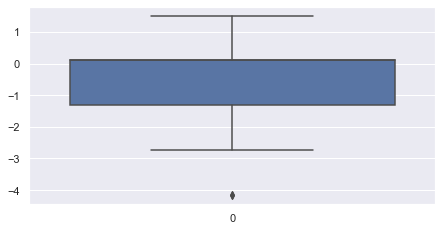

In [164]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(train['HourSpendOnApp'])

### NumberOfAddress

In [165]:
percentile25 = train['NumberOfAddress'].quantile(0.25)
percentile75 = train['NumberOfAddress'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.8284302707281155

In [166]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 3.630710959671475
Lower limit -3.6830101232409866


In [167]:
train[train['NumberOfAddress'] > upper_limit]
train[train['NumberOfAddress'] < lower_limit]
train.loc[:,['NumberOfAddress']]

NumberOfAddress
0            0.888066
1           -0.940365
2           -1.955023
3            1.143982
4           -0.940365
...               ...
3936        -0.940365
3937         0.888066
3938         1.722389
3939        -0.277707
3940        -0.940365

[3938 rows x 1 columns]

In [168]:
train = train[train['NumberOfAddress'] < upper_limit]
train.shape

(3938, 23)

<Axes: >

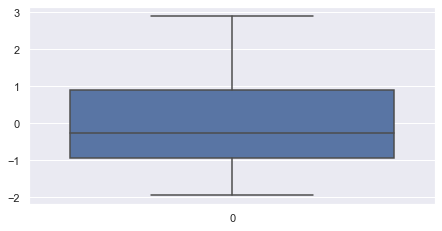

In [169]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(train['NumberOfAddress'])

### OrderAmountHikeFromLastYear

In [170]:
percentile25 = train['OrderAmountHikeFromlastYear'].quantile(0.25)
percentile75 = train['OrderAmountHikeFromlastYear'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.5478059492423424

In [171]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 3.1474771030558406
Lower limit -3.0437466939135294


In [172]:
train[train['OrderAmountHikeFromlastYear'] > upper_limit]
train[train['OrderAmountHikeFromlastYear'] < lower_limit]
train.loc[:,['OrderAmountHikeFromlastYear']]

OrderAmountHikeFromlastYear
0                       -1.757849
1                        1.383765
2                        0.592836
3                       -1.757849
4                       -0.319143
...                           ...
3936                     0.027623
3937                    -1.195206
3938                    -1.195206
3939                    -0.319143
3940                     0.027623

[3938 rows x 1 columns]

In [173]:
train = train[train['OrderAmountHikeFromlastYear'] < upper_limit]
train.shape

(3938, 23)

<Axes: >

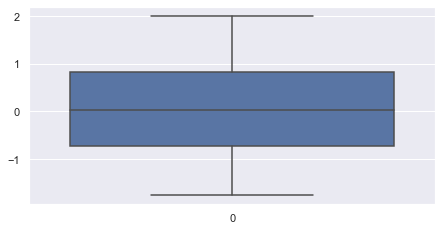

In [174]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(train['OrderAmountHikeFromlastYear'])

### CouponUsed

In [175]:
percentile25 = train['CouponUsed'].quantile(0.25)
percentile75 = train['CouponUsed'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.7341563245994712

In [176]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1.6041179074695588
Lower limit -1.332507390928326


In [177]:
train[train['CouponUsed'] > upper_limit]
train[train['CouponUsed'] < lower_limit]
train.loc[:,['CouponUsed']]

CouponUsed
0      -1.637802
1      -0.231273
2      -0.231273
3       0.502883
4       0.502883
...          ...
3936    0.502883
3937    1.624023
3938    0.502883
3939    0.502883
3940    0.987742

[3938 rows x 1 columns]

In [178]:
train = train[train['CouponUsed'] < upper_limit]
train.shape

(3629, 23)

<Axes: >

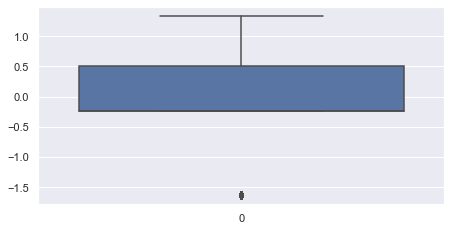

In [179]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(train['CouponUsed'])

### OrderCount

In [180]:
percentile25 = train['OrderCount'].quantile(0.25)
percentile75 = train['OrderCount'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.2773063395963995

In [181]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1.959262694565288
Lower limit -3.14996266382031


In [182]:
train[train['OrderCount'] > upper_limit]
train[train['OrderCount'] < lower_limit]
train.loc[:,['OrderCount']]

OrderCount
0      -1.234003
1      -1.234003
2      -1.234003
3       1.626490
4       0.657550
...          ...
3935    1.249253
3936    0.043303
3938    0.043303
3939    0.043303
3940    1.412957

[3629 rows x 1 columns]

In [183]:
train = train[train['OrderCount'] < upper_limit]
train.shape

(3625, 23)

<Axes: >

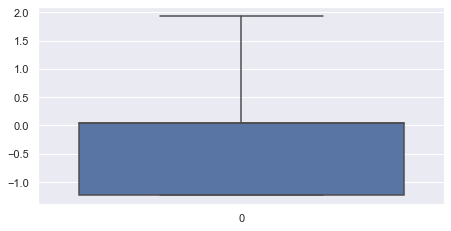

In [184]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(train['OrderCount'])

### Tenure

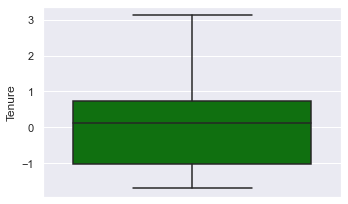

In [185]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['Tenure'],color='green', orient='v')
plt.tight_layout()
plt.show()

Data awal Tenure, ada beberapa pencilan dari data tersebut.

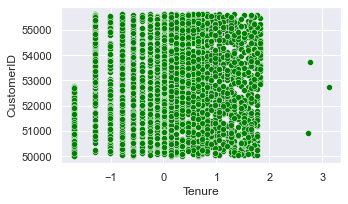

In [186]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['Tenure'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Dari visualisasi scatterplot di atas, terdapat 4 nilai yang jaraknya jauh dari distribusi.

In [187]:
train['Tenure'].value_counts()

-1.289642    476
-1.688258    349
 0.132848    330
 0.012191    165
-0.117336    152
 0.352865    132
-0.582398    131
 0.246046    129
-0.776894    120
-0.411354    120
 0.454157    118
 0.642750    113
 0.731067    110
-1.005467    109
-0.257633    107
 0.815935     98
 0.550600     96
 0.976584     84
 1.052884     78
 1.126793     66
 0.897681     64
 1.335897     58
 1.198493     52
 1.268146     51
 1.650165     45
 1.466190     44
 1.590247     42
 1.766167     42
 1.401873     41
 1.528950     38
 1.708782     32
 1.822385     30
 3.117140      1
 2.726881      1
 2.767989      1
Name: Tenure, dtype: int64

Keempat nilai yang menjadi pencilan yakni 50, 51, 60, dan 61 atau bisa dikatakan di atas 31.

In [188]:
otenure = train[train['Tenure']>31]
otenure

Empty DataFrame
Columns: [CustomerID, CityTier, SatisfactionScore, Complain, Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, PreferredLoginDevice_Computer, PreferredLoginDevice_Mobile Phone, PreferredPaymentMode_Cash on Delivery, PreferredPaymentMode_Credit Card, PreferredPaymentMode_Debit Card, PreferredPaymentMode_E wallet, PreferredPaymentMode_UPI, Gender, Churn]
Index: []

[0 rows x 23 columns]

Dari data di atas, terlihat bahwa data dari nilai-nilai pencilan tersebut tidak mengindikasikan bahwa customer churn. Hal tersebut mungkin terjadi karena kesalahan penulisan, sehingga saya hanya akan mengganti nilai-nilai pencilan tersebut dengan median saja yang robust terhadap outliers.

In [189]:
median_tenure = train['Tenure'].median(axis=0)
print('Median dari Tenure adalah', median_tenure)
train['Tenure'] = train['Tenure'].mask(train['Tenure']>31, median_tenure)

Median dari Tenure adalah 0.13284816826121928


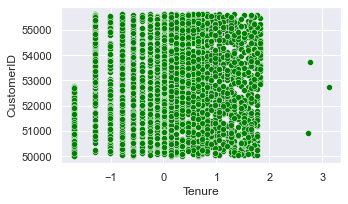

In [190]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['Tenure'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

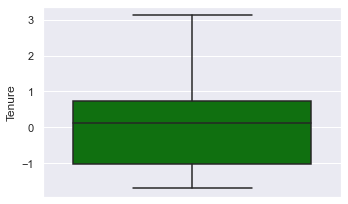

In [191]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['Tenure'],color='green', orient='v')
plt.tight_layout()
plt.show()

Setelah dilakukan transformasi, data 'Tenure' bebas dari pencilan.

### WarehouseToHome

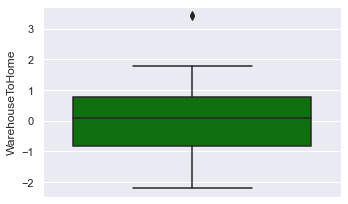

In [192]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['WarehouseToHome'],color='green', orient='v')
plt.tight_layout()
plt.show()

Visualisasi boxplot di atas menunjukkan bahwa ada beberapa data pencilan.

In [193]:
train['WarehouseToHome'].value_counts()

-0.831335    360
 0.103416    348
-1.095000    281
-1.400601    254
 0.368034    221
 0.241202    197
-0.600448    182
-1.761459    179
 0.485356    146
-0.212565    145
-0.395799    143
-0.047100    142
 1.499026     66
 1.190362     65
 1.552892     65
 1.604574     63
 0.964574     62
 1.043971     60
 1.258081     60
 0.594352     59
 1.322558     56
 1.119105     56
 1.747955     56
 1.442810     51
 0.880470     51
 0.696007     47
 1.384057     47
 0.791146     44
 1.654223     42
 1.701975     40
 1.792274     31
-2.197915      4
 3.429627      1
 3.438088      1
Name: WarehouseToHome, dtype: int64

Nilai yang merupakan pencilan di atas adalah 126 dan 127 atau bisa dikatakan di atas 36.

In [194]:
owarehouse = train[train['WarehouseToHome']>36]
owarehouse

Empty DataFrame
Columns: [CustomerID, CityTier, SatisfactionScore, Complain, Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount, PreferredLoginDevice_Computer, PreferredLoginDevice_Mobile Phone, PreferredPaymentMode_Cash on Delivery, PreferredPaymentMode_Credit Card, PreferredPaymentMode_Debit Card, PreferredPaymentMode_E wallet, PreferredPaymentMode_UPI, Gender, Churn]
Index: []

[0 rows x 23 columns]

Nilai pencilan tersebut juga tidak mengindikasikan bahwa customer churn. Hal di atas terjadi karena mungkin memang jarak warehouse ke rumah customer sangat jauh, tapi customer tetap ingin berlangganan dengan kita. Sehingga saya akan mengganti nilainya dengan nilai high limit dari WarehouseToHome(Q3 + (1.5 x IQR)) mempertimbangkan jarak orisinalnya yang memang paling jauh namun agar tidak menjadi pencilan.

In [195]:
q1warehouse = train['WarehouseToHome'].quantile(0.25)
q3warehouse = train['WarehouseToHome'].quantile(0.75)
iqrwarehouse = q3warehouse - q1warehouse
highlimit_warehouse = q3warehouse + (iqrwarehouse * 1.5)
print ('Nilai High Limit dari WarehouseToHome adalah', highlimit_warehouse)

Nilai High Limit dari WarehouseToHome adalah 3.224867961596477


In [196]:
train['WarehouseToHome'] = train['WarehouseToHome'].mask(train['WarehouseToHome']>36, highlimit_warehouse)

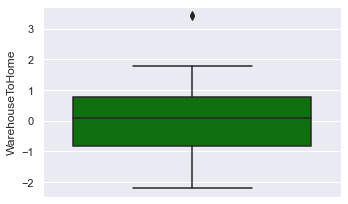

In [197]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['WarehouseToHome'],color='green', orient='v')
plt.tight_layout()
plt.show()

Setelah dilakukan transformasi sedemikian rupa, data WarehouseToHome bebas dari nilai pencilan.

### NumberOfDeviceRegistered

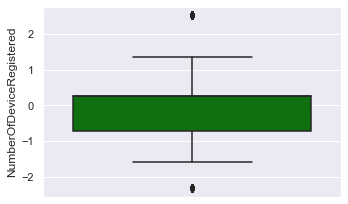

In [198]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['NumberOfDeviceRegistered'],color='green', orient='v')
plt.tight_layout()
plt.show()

In [199]:
train['NumberOfDeviceRegistered'].value_counts()

 0.260014    1522
-0.721612    1104
 1.343815     571
-1.588645     179
-2.322643     151
 2.520690      98
Name: NumberOfDeviceRegistered, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

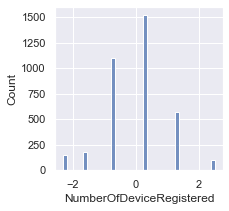

In [200]:
fig = plt.subplots(figsize=(3,3))
sns.histplot(train, x='NumberOfDeviceRegistered', linewidth=1)
plt.show

Dilihat dari visualisasi di atas, persebaran data NumberOfDeviceRegistered memiliki beberapa nilai pencilan. Namun, nilai-nilai tersebut menjadi pencilan karena persebaran data yang intens di tengah-tengah. Selain itu, distribusi datanya masih normal sehingga tidak mempengaruhi agregasi nantinya. Dengan demikian, saya tidak melakukan perubahan terhadap data NumberOfDeviceRegistered.

### CashbackAmount

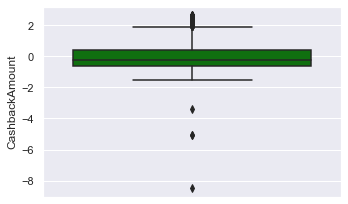

In [201]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

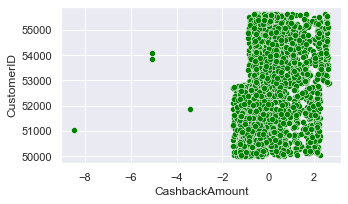

In [202]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['CashbackAmount'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Pada case CashbackAmount ini terlihat ada beberapa nilai pencilan di bawah 100. Selanjutnya akan saya ubah menjadi nilai percentile yang mendekati 100.

In [203]:
quantile_cashback = train[['CashbackAmount']].quantile([0.1, 0.2, 0.3, 0.4, 0.5])
quantile_cashback

CashbackAmount
0.1       -1.103801
0.2       -0.778814
0.3       -0.573475
0.4       -0.450946
0.5       -0.249193

Nilai percentile10 adalah nilai yang paling mendekati 100, maka saya akan mengubah data customer yang dibawah 100 menjadi percentile10

In [204]:
P10cashback = round(train['CashbackAmount'].quantile(0.1))

print('Nilai Percentile 10 dari CashbackAmount adalah', P10cashback)

Nilai Percentile 10 dari CashbackAmount adalah -1


In [205]:
train['CashbackAmount'] = train['CashbackAmount'].mask(train['CashbackAmount']<100, P10cashback)

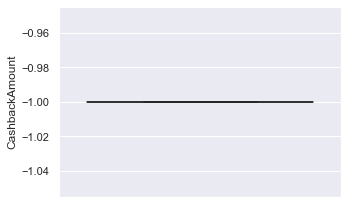

In [206]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

Masih terdapat banyak nilai pencilan di atas 250, sehingga saya akan melakukan transformasi terhadap angka-angka tersebut menjadi nilai Percentile yang paling mendekati 250.

In [207]:
quantile_cashback = train[['CashbackAmount']].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95])
quantile_cashback

CashbackAmount
0.10            -1.0
0.20            -1.0
0.30            -1.0
0.40            -1.0
0.50            -1.0
0.60            -1.0
0.70            -1.0
0.80            -1.0
0.85            -1.0
0.90            -1.0
0.95            -1.0

Nilai yang paling mendekati 250 adalah percentile90, maka saya akan mentransformasikan nilai-nilai di atas menjadi percentile90.

In [208]:
P90cashback = round(train['CashbackAmount'].quantile(0.9))
print('Nilai Percentile90 adalah', P90cashback)

Nilai Percentile90 adalah -1


In [209]:
train['CashbackAmount'] = train['CashbackAmount'].mask(train['CashbackAmount']>250, P90cashback)

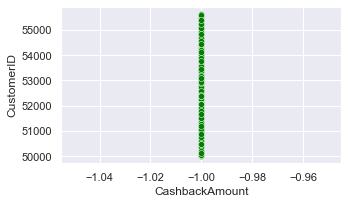

In [210]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=train, x=train['CashbackAmount'], y=train['CustomerID'],color='green')
plt.tight_layout()
plt.show()

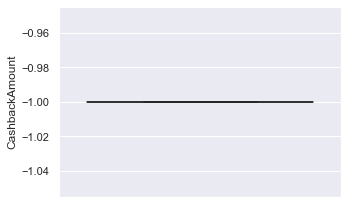

In [211]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=train['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

Data CashbackAmount bebas dari pencilan.

<h3> drop column </h3>

In [212]:
X = X.drop(['CustomerID'],axis=1)
ytrain = train['Churn']
Xtrain = train.drop(['CustomerID','Churn'], axis=1)
Xtest = Xtest.drop(['CustomerID'], axis=1)

In [213]:
print('X train :',Xtrain.shape)
print('X test :',Xtest.shape)
print('y train :',ytrain.shape)
print('y test :',ytest.shape)

X train : (3625, 21)
X test : (1689, 21)
y train : (3625,)
y test : (1689, 1)


In [252]:
y = y.drop(['CustomerID'],axis=1)

<h1> ML Model & Model Evaluation </h1>


<ul><b>Machine Learning Model</b>
    <li>DecisionTree</li>
    Reference: <a href='https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial'>Decision-Tree Classifier Tutorial</a>, 
    <a href='https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset'>Introduction to Decision Trees</a>, 
    <a href='https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd'>Decision Tree and Gini Impurity</a>, 
    <a href='https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb'>Building and Visualizing Decision Tree in Python</a>,
    <a href='https://medium.com/mlearning-ai/breast-cancer-detection-with-decision-trees-f66637ac482e'>Decision Tree with Python Scikit-Learn</a>
    <li>RandomForest</li>
    Reference: <a href='https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial'>Random Forest Classifier Tutorial</a>,
    <a href='https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance'>Random Forest Classifier + Feature Importance</a>,
    <a href='https://medium.com/p/24d0893d51c0'>Random Forest in Python</a>,
    <a href='https://medium.com/p/28d2aa77dd74'>Hyperparameter Tuning the Random Forest in Python</a>
    <li>GradientBoostingMachines(GBM)</li>
    <li>SupportVectorMachines(SVM)</li>
    <li>LogisticRegression</li>

<ul><b>Random Forest Asumption</b>
    <li>Independence of observations: The observations in the data set should be independent of each other. That is, the values of one observation should not be influenced by the values of another observation.</li>
    <li>No multicollinearity: If the data includes multiple variables, they should not be highly correlated with each other. Multicollinearity can lead to unstable and unreliable estimates of the feature importance.</li>
    <li>No missing values: The data set should not have any missing values. If there are missing values, they must be imputed or removed before using the random forest model.</li>
    <li>Balanced class distribution: The classes in the data set should be roughly balanced. If one class is much more prevalent than the others, it can lead to biased estimates of the feature importance and prediction accuracy.</li>
    <li>No outliers: The data set should not have any extreme outliers. Outliers can have a disproportionate influence on the model and may lead to overfitting.</li>
</ul>
<i>Random forests are generally robust to violations of these assumptions and can still produce good results in many cases.</i>

Support Vector Machines (SVM) -> need ohe<br>
Random Forests<br>
Gradient Boosting Machines (GBM)<br>
Extreme Gradient Boosting (XGBoost)<br>
AdaBoost

<ul><b>Logistic Regression</b>
    <li>Binary logistic regression requires the dependent variable to be binary.</li>
    <li>For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.</li>
    <li>Only the meaningful variables should be included</li>
    <li>The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.</li>
    <li>The independent variables are linearly related to the log odds</li>
    <li>Logistic regression requires quite large sample sizes</li>
</ul>
References: <a href = 'https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8'>Building A Logistic Regression in Python</a>

<h3>Random Forest Model</h3>

<h4>Train Model</h4>

In [253]:
X1_train = Xtrain.copy()
X1_test = Xtest.copy()
y1_train = ytrain.copy()
y1_test = ytest.copy()

In [254]:
print('X :',X.shape)
print('X train :',X1_train.shape)
print('X test :',X1_test.shape)
print('y train :',y1_train.shape)
print('y test :',y1_test.shape)

X : (5630, 21)
X train : (3625, 21)
X test : (1689, 21)
y train : (3625,)
y test : (1689, 1)


In [255]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X1_train,y1_train)

RandomForestClassifier(random_state=42)

<h4>Predictions on the Test Set</h4>

In [256]:
#predict on the test data
rf_predict = rf.predict(X1_test)

<h4>Model Evaluation</h4>

In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_validate

In [258]:
rf_y_pred = rf.predict(X1_test)
rf_y_pred_train = rf.predict(X1_train)
rf_y_pred_proba = rf.predict_proba(X1_test)
rf_y_pred_proba_train = rf.predict_proba(X1_train)

In [259]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, rf_y_pred))
print("Precision (Test Set): %.2f" % precision_score(y1_test, rf_y_pred))
print("Recall (Test Set): %.2f" % recall_score(y1_test, rf_y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y1_test, rf_y_pred))

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.79
F1-Score (Test Set): 0.86



terdapat tradeoff antara Precision dan Recall<br>
cara menanggulangi:<br>
ROC AUC atau F1, oversampling(SMOTE), weight class

In [260]:
print(classification_report(y1_test['Churn'], rf_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1414
           1       0.94      0.79      0.86       275

    accuracy                           0.96      1689
   macro avg       0.95      0.89      0.92      1689
weighted avg       0.96      0.96      0.96      1689



In [261]:
print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train, rf_y_pred_proba_train[:, 1]))
print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test, rf_y_pred_proba[:, 1]))

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.96


In [277]:
cv_score = cross_validate(rf, X, y, cv=5, scoring='roc_auc', return_train_score=True)

In [278]:
print('roc_auc (crossval train): '+ str(cv_score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(cv_score['test_score'].mean()))

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9994775613792072


Text(0.5, 1.0, 'feature importance score')

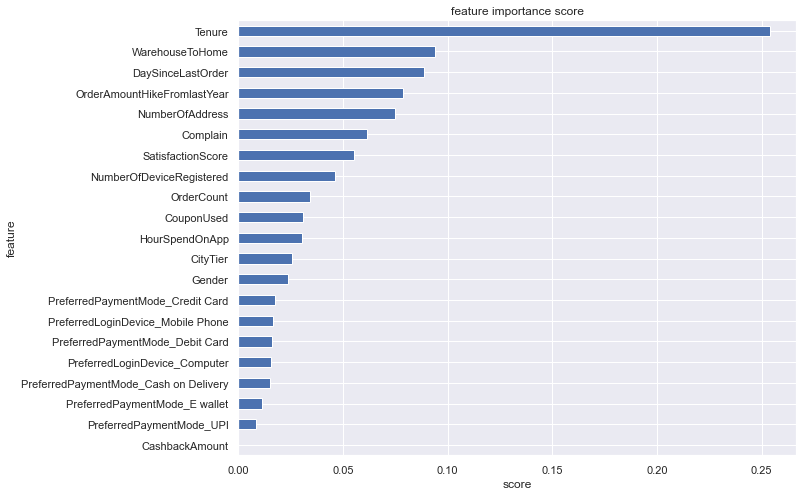

In [262]:
feature_importance = pd.Series(rf.feature_importances_,index=X.columns)
ax = feature_importance.nlargest(25).plot(kind='barh',figsize=(10,8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [263]:
from pprint import pprint

In [264]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


<li>The score that we had means that the model is likely overvitting the training data.</li>
<li>Leaking data?</li>
<li>Ada kecenderungan TN atau FN</li>
<li>Some tech to try to solve the issue /maybe:</li>
<ul>
    <li>Regularization</li>
    <li>Feature Selection</li>
    <li>Increase amount of training data</li>
</ul>

<h3>Logistic Regression</h3>

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
lr = LogisticRegression()

In [288]:
X2_train = Xtrain.copy()
X2_test = Xtest.copy()
y2_train = ytrain.copy()
y2_test = ytest.copy()
print('X train :',X2_train.shape)
print('X test :',X2_test.shape)
print('y train :',y2_train.shape)
print('y test :',y2_test.shape)

X train : (3625, 21)
X test : (1689, 21)
y train : (3625,)
y test : (1689, 1)


In [289]:
lr.fit(X2_train,y2_train)

LogisticRegression()

In [290]:
lr_y_pred = lr.predict(X2_test)
lr_y_pred_train = lr.predict(X2_train)
lr_y_pred_proba = lr.predict_proba(X2_test)
lr_y_pred_proba_train = lr.predict_proba(X2_train)

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_validate

In [292]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, lr_y_pred))
print("Precision (Test Set): %.2f" % precision_score(y2_test, lr_y_pred))
print("Recall (Test Set): %.2f" % recall_score(y2_test, lr_y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y2_test, lr_y_pred))

Accuracy (Test Set): 0.89
Precision (Test Set): 0.78
Recall (Test Set): 0.49
F1-Score (Test Set): 0.60


In [293]:
print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train, lr_y_pred_proba_train[:, 1]))
print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test, lr_y_pred_proba[:, 1]))

roc_auc (train-proba): 0.89
roc_auc (test-proba): 0.86


In [294]:
cv_score = cross_validate(lr, X, y, cv=5, scoring='roc_auc', return_train_score=True)

In [295]:
print('roc_auc (crossval train): '+ str(cv_score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(cv_score['test_score'].mean()))

roc_auc (crossval train): 0.8786153791425788
roc_auc (crossval test): 0.8776098976541317


In [296]:
print(classification_report(y2_test['Churn'], lr_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.78      0.49      0.60       275

    accuracy                           0.89      1689
   macro avg       0.84      0.73      0.77      1689
weighted avg       0.89      0.89      0.88      1689



<Axes: title={'center': 'Feature Importance'}>

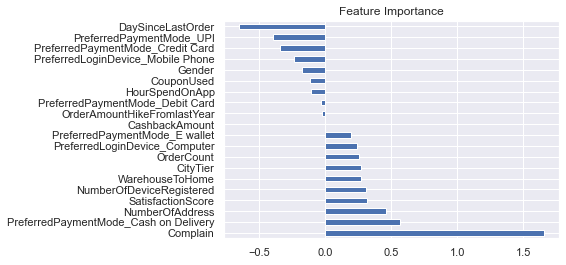

In [297]:
feature_list = X2_test.columns
importance = lr.coef_[0]
#importance is a list so you can plot it. 
features_importances = pd.Series(importance, index=feature_list)
features_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

<h4>Oversampling</h4>

In [298]:
df.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [299]:
from imblearn.over_sampling import SMOTE

# melakukan oversampling pada data train menggunakan SMOTE
smote = SMOTE()
Xtrain_oversampled, ytrain_oversampled = smote.fit_resample(X2_train,y2_train)

# training model logistic regression pada data yang sudah di-oversampling
lr_oversampled = LogisticRegression()
lr_oversampled.fit(Xtrain_oversampled, ytrain_oversampled)

# menghasilkan prediksi pada data test yang sudah di-oversampling
y_pred_oversampled = lr_oversampled.predict(X2_test)

# mencetak nilai akurasi, presisi, recall, dan f1-score pada data test yang sudah di-oversampling
print("Accuracy ((Test Set - Oversampled): %.2f" % accuracy_score(y2_test, y_pred_oversampled))
print("Precision (Test Set - Oversampled): %.2f" % precision_score(y2_test, y_pred_oversampled))
print("Recall (Test Set - Oversampled): %.2f" % recall_score(y2_test, y_pred_oversampled))
print("F1-Score (Test Set - Oversampled): %.2f" % f1_score(y2_test, y_pred_oversampled))

Accuracy ((Test Set - Oversampled): 0.85
Precision (Test Set - Oversampled): 0.53
Recall (Test Set - Oversampled): 0.66
F1-Score (Test Set - Oversampled): 0.59


In [300]:
print(classification_report(y2_test['Churn'], y_pred_oversampled))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1414
           1       0.53      0.66      0.59       275

    accuracy                           0.85      1689
   macro avg       0.73      0.77      0.75      1689
weighted avg       0.87      0.85      0.86      1689



ANALISA :
Setelah dilakukan oversampling, terjadi perubahan pada evaluasi performa model.

<li>Model terlihat lebih baik dalam memprediksi kelas minoritas dengan nilai recall dan F1-score untuk kelas 1 meningkat menjadi 0,67 dan 0,59 secara berturut-turut. </li>
<li>Namun, nilai presisi kelas 1 tetap rendah, yaitu 0,53. </li>
<li>Model juga menunjukkan penurunan dalam presisi, recall, dan F1-score untuk kelas mayoritas dengan nilai presisi dan recall kelas 0 yang menurun menjadi 0,93 dan 0,88, sementara F1-score kelas 0 adalah 0,91. </li>
<li>Akurasi model turun menjadi 0,85.</li>
<hr>
Secara keseluruhan, hasil Classification Report menunjukkan bahwa oversampling tidak memberikan dampak yang signifikan pada kinerja model dalam memprediksi kedua kelas

param values: 1e-05; train: 0.8554677704557758; test: 0.8121615018644722
param values: 1.9999999999999998e-05; train: 0.855690013485255; test: 0.8123286614375723
param values: 2.9999999999999997e-05; train: 0.8558858886976773; test: 0.8125266812395525
param values: 3.9999999999999996e-05; train: 0.8560849926223923; test: 0.8127529895846728
param values: 4.9999999999999996e-05; train: 0.8562997019898554; test: 0.8129895846727531
param values: 5.9999999999999995e-05; train: 0.8564961153209932; test: 0.8132236080750931
param values: 7e-05; train: 0.8567248157750578; test: 0.8134627748489136
param values: 7.999999999999999e-05; train: 0.8569050855447322; test: 0.8136993699369938
param values: 8.999999999999999e-05; train: 0.8570794360085368; test: 0.813881959624534
param values: 9.999999999999999e-05; train: 0.857260782015642; test: 0.8140799794265141
param values: 0.00010999999999999999; train: 0.8574394374291701; test: 0.8143268612575544
param values: 0.00011999999999999999; train: 0.857

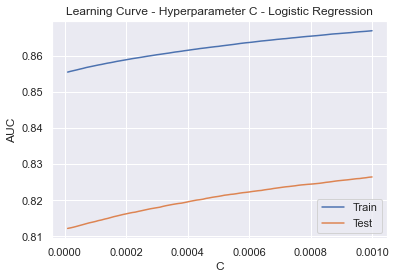

In [301]:
# Analyzing Learning Curve

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values) :
    train_scores = []
    test_scores = []
    
    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X2_train, y2_train)
        
        #eval on train
        rs_y_pred_train_proba = model.predict_proba(X2_train)
        train_auc = roc_auc_score(y2_train, rs_y_pred_train_proba[:, 1])
        train_scores.append(train_auc)
        
        #eval on test
        rs_y_pred_proba = model.predict_proba(X2_test)
        test_auc = roc_auc_score(y2_test, rs_y_pred_proba[:, 1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.00001, 0.001, 100)]
draw_learning_curve(param_values)

In [304]:
def eval_classification(rs):
    y_pred = rs.predict(Xtest)
    y_pred_train = rs.predict(Xtrain)
    y_pred_proba = rs.predict_proba(Xtest)
    y_pred_proba_train = rs.predict_proba(Xtrain)

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
    
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
        
    cv_score = cross_validate(lr, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(cv_score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(cv_score['test_score'].mean()))

In [305]:
# tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(Xtrain, ytrain)
eval_classification(rs)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.80
Recall (Test Set): 0.49
F1-Score (Test Set): 0.61
roc_auc (train-proba): 0.89
roc_auc (test-proba): 0.86
roc_auc (crossval train): 0.8786153791425788
roc_auc (crossval test): 0.8776098976541317


<h3>Decision Tree</h3>

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [218]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xtrain, ytrain) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.72
Recall (Test Set): 0.83
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00


In [219]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = model.predict(Xtest)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.85
Precision (Test Set): 1.00
Recall (Test Set): 0.02
F1-Score (Test Set): 0.04
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.69
